---
# Clean And Analyze Employee Exit Surveys
---


In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) and the [Technical and Further Education (TAFE)](https://en.wikipedia.org/wiki/Technical_and_further_education) institute in Queensland, Australia.  You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). 
<br>\* *Note: Dataquest had modified the datasets to  make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)*

We want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
- What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Here is a preview of a couple columns we'll work with

|dete_survey.csv columns||
|-|-|
|ID:| An id used to identify the participant of the survey|
|<br>SeparationType:| The reason why the person's employment ended|
|<br>Cease Date:| The year or month the person's employment ended|
|<br>DETE Start Date:| The year the person began employment with the DETE|


|tafe_survey.csv columns||
|-|-|
|Record ID:| An id used to identify the participant of the survey|
|<br>Reason for ceasing employment:| The reason why the person's employment ended|
|<br>LengthofServiceOverall. <br>Overall Length of Service at Institute (in years):| The length of the person's employment (in years)|

Now that we know what we want, and know what we are working with, let's start by reading the datasets into pandas and exploring them.


## 1. Setting up the Environment
---

In [1]:
import pandas as pd
from pandas.plotting import table
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## 2. Reading and Exploring the Data
---

In [3]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

## 2.1. Exploring `dete_survey`

In [4]:
dete_survey

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977,1999,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980,1980,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009,2009,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001,2009,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN


*Pay attention* to `DETE Start Date` and `Role Start Date` columns: 

They contains *'Not Stated'* values that indicate values are missing, but ideally this should be represented as NaN.

In [5]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [6]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

*There are a lot of columns with missing values.*

In [7]:
#check the values

for i in range (0, 56):
    print('------------------------------------------------')
    print(dete_survey.columns[i])
    print('------------------------------------------------')
    print(dete_survey.iloc[:,i].value_counts())
    print('------------------------------------------------')
    print('\n')

------------------------------------------------
ID
------------------------------------------------
823    1
270    1
280    1
279    1
278    1
      ..
546    1
545    1
544    1
543    1
1      1
Name: ID, Length: 822, dtype: int64
------------------------------------------------


------------------------------------------------
SeparationType
------------------------------------------------
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64
------------------------------------------------


------------------------------------------------
Cease Date
------------------------------------------------
2012     

Things we notice on `dete_survey`:
- A lot of column with missing values
- Many columns that we don't need for our analysis purposes
- Multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## 2.2. Exploring `tafe_survey`

In [8]:
tafe_survey

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,Yes,Yes,Yes,Yes,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,No,No,Yes,No,Female,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2


*Some columns contain '-'*, what does it represent? we should figure it out later

In [9]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

*Pay attention* to the *column names*: 
- The column names are *unnecessarily long*, which makes it hard to understand.
- Many columns names are *similar*.
<br>For example, look at column *`55 - 59`*, all of them have *'Did you undertake Team Induction?'* as a part of their column names.


In [10]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [11]:
#check the values

for i in range (0, 59):
    print('------------------------------------------------')
    print(tafe_survey.columns[i])
    print('------------------------------------------------')
    print(tafe_survey.iloc[:,i].value_counts())
    print('------------------------------------------------')
    print('\n')

------------------------------------------------
Record ID
------------------------------------------------
6.342194e+17    1
6.349929e+17    1
6.342081e+17    1
6.345951e+17    1
6.341719e+17    1
               ..
6.348914e+17    1
6.342080e+17    1
6.349520e+17    1
6.342684e+17    1
6.341820e+17    1
Name: Record ID, Length: 702, dtype: int64
------------------------------------------------


------------------------------------------------
Institute
------------------------------------------------
Brisbane North Institute of TAFE         161
Southern Queensland Institute of TAFE    142
Central Queensland Institute of TAFE     108
Sunshine Coast Institute of TAFE          91
Tropical North Institute of TAFE          70
SkillsTech Australia                      57
Southbank Institute of Technology         43
Barrier Reef Institute of TAFE            14
Mount Isa Institute of TAFE               12
Wide Bay Institute of TAFE                 2
The Bremer Institute of TAFE              

Name: WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job, dtype: int64
------------------------------------------------


------------------------------------------------
WorkUnitViews. Topic:23. My job provided sufficient variety
------------------------------------------------
Agree                296
Strongly Agree       134
Neutral               99
Disagree              45
Strongly Disagree     30
Not Applicable         7
Name: WorkUnitViews. Topic:23. My job provided sufficient variety, dtype: int64
------------------------------------------------


------------------------------------------------
WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job
------------------------------------------------
Agree                298
Strongly Agree       148
Neutral               91
Disagree              45
Strongly Disagree     22
Not Applicable         6
Name: WorkUnitViews. Topic:24. I was able to cope with the level o

On `tafe_survey`, we notice things similar to what we see on dete_survey:

- A lot of column with missing values
- Many columns that we don't need for our analysis purposes
- Multiple columns/answers that indicate an employee resigned because they were dissatisfied.

**In this section we explored both dete_survey and tafe_suvey dataframes, and  learned the following:**
- *Both dataframes:*
    - Have many of the same columns with different names.
    - Have a lot of column with missing values that we have to handle.
    - Have many unneeded columns that we can drop.
    - Have many columns / answers that indicate an employee resigned because they were dissatisfied.
    
- `dete_survey:`
    - On `DETE Start Date` and `Role Start Date` columns:
        - Some missing values are reprsented by 'Not Stated'instead of 'NaN'. We can modify it to make our analysis easier.
- `tafe_survey:`
    - Have column names with very long names that we can modify
    - Have many columns with similar names that we may be able to drop or combine.

Now that we learned more about the dataset, it's time to clean them so we can work on our analysis.

## 3. Cleaning the Data
---

## 3.1. Converting 'Not Stated' --> 'NaN' by rereading `dete_survey`
Using `pd.read_csv()` to specify values that should be represented as NaN

In [12]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
dete_survey

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN


We can see that 'Not Stated' has been converted to 'Nan'

## 3.2. Dropping columns we don't need

In [13]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
dete_survey_updated

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,False,True,False,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,True,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [14]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)
tafe_survey_updated

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2


Unnecessary columns have been dropped. Now our dataframes are easier to work with.

## 3.3 Renaming columns

Each dataframe contains many of the same columns, but the column names are different. 

Below are some of the columns we'd like to use for our final analysis:

|dete_survey | tafe_survey| 	Definition|
|-|-|-|
|ID|	Record ID	|An id used to identify the participant of the survey|
|SeparationType	|Reason for ceasing employment| The reason why the participant's employment ended|
|Cease Date	|CESSATION YEAR	|The year or month the participant's employment ended|
|DETE Start Date |		|The year the participant began employment with the DETE|
| |LengthofServiceOverall.Overall Length of Service at Institute (in years)|The length of the person's employment (in years)|
|Age|	CurrentAge. Current Age| The age of the participant
|Gender|	Gender. What is your Gender?| The gender of the participant|

We are going to combine them, so before we do that let's standardize the column names  using `DataFrame.columns` and *vectorized string methods.*

In [15]:
#standardize dete_survey_updated column names to snake_case
dete_survey_updated = dete_survey
dete_survey_updated.columns = dete_survey.columns.str.replace('\s+', '_').str.lower().str.strip()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'professional_development',
       'opportunities_for_promotion', 'staff_morale', 'workplace_issue',
       'physical_environment', 'worklife_balance',
       'stress_and_pressure_support', 'performance_of_supervisor',
       'peer_support', 'initiative', 'skills', 'coach', 'career_aspirations',
       'feedback', 'further_pd', 'communication', 'my_say', 'inform

In [16]:
#rename tafe_survey_updated columns using mapping

mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 
           'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
           'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position',
           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 
           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey.rename(mapping, axis = 1)

#printing only column names that start with a lowercase --we don't care about the other columns
for col_name in tafe_survey_updated.columns:
    if col_name[0] == col_name[0].lower():
        print(col_name)

id
cease_date
separationtype
gender
age
employment_status
position
institute_service
role_service


Now that we have a standardized column names on both dataframes, we can easily combine both dataframes for our analysis later on.

## 4. Data Filtering
---

We have a lot of columns that we don't need, so let's remove more unneeded data by *using smaller part of our data set and use that subset for analysis.*

Recall that our end goal is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
- What about employees who have been at the job longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Let's *start by displaying the first five rows of both dataframes* to see which column we need to work with.

In [17]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,kept_informed,wellness_programs,health_&_safety,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [18]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


*Pay attention* to *'separationtype'* columns in both dataframes: 
- We can see that'separationtype' column on each dataframe represents the reason why employees decide to leave their job
- Each contains a couple of different separation types. 

*For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.*

## 4.1. Resignation

**Important to note** that dete_survey_updated dataframe contains *multiple separation types* with the string 'Resignation':
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

We have to account for each of these variations so we don't unintentionally drop data.

First, let's review the unique values in the separationtype column in both dataframes using `Series.value_counts()` method

In [19]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [20]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [21]:
# we select only the data for survey respondents who have a Resignation separation type
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].
                                        str.split('-').str[0] == 'Resignation'].copy()
dete_resignations.head()

#the following code
# dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')]
# dete_resignations.head()
#produce the same result

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,kept_informed,wellness_programs,health_&_safety,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,N,N,N,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [22]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,NaN,NaN,NaN,NaN,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Yes,Yes,Yes,Yes,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,No,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


Alright, now *we are only working with rows that have a Resignation separation type* on both dataframes.

## 5. Verifying Data Quality
---

At this point we are almost done with data cleaning. However, we still have a few columns that we need to handle. Before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies.

We will *focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense.*

Here are a few things we want to look for:

- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, *it wouldn't make sense to have years after the current date.*
- Given that most people in this field start working in their 20s, it's also *unlikely that the dete_start_date was before the year 1940.**
- *If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. However, if we only find a small amount of values that are unrealistically high or low, we can remove them.*

Let's *verify* the years in the `cease_date` and `dete_start_date` columns.

We are *checking* the years in each dataframe for *logical inconsistencies.*

## 5.1. Checking `dete_resignations` years

In [23]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
2010         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [24]:
yr_pattern = r"([2][0-1][0-9][0-9])" #vectorized string methods to extract the year
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(yr_pattern).astype(float)

In [25]:
dete_resignations['cease_date'].value_counts().sort_index(ascending = False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [26]:
#controlling boxplot aesthetics
sns.set(font_scale=2)
sns.set_palette("PiYG")
sns.set_style("white")

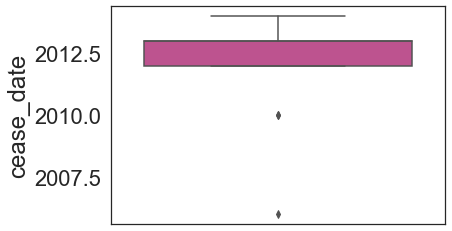

In [27]:
sns.boxplot(y = dete_resignations['cease_date'])

In [28]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending = False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

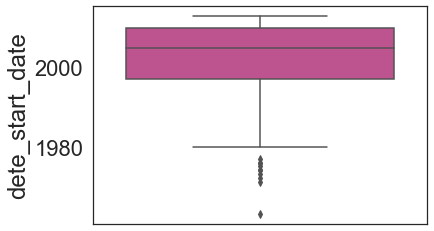

In [29]:
sns.boxplot(y = dete_resignations['dete_start_date'])

Years are between *1963 - 2013, no logical inconsistencies.*

## 5.2. Checking `tafe_resignations` years

In [30]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending = False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

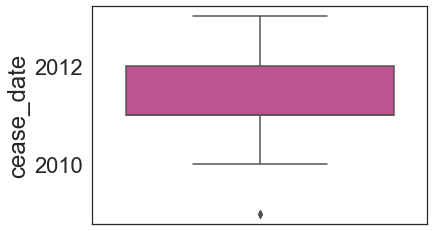

In [31]:
sns.boxplot(y = tafe_resignations['cease_date'])

Years are between *2009 - 2013, no logical inconsistencies.*

*In this section, we found the following:*

- There aren't any major issues with the years.
- The years in each dataframe don't span quite the same number of years. We might be able to drop a few years that we don't need.

*So what's next?*

Remember that our end goal is to answer the following questions:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
- What about employees who have been at the job longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Let's *display both `dete_resignations` and `tafe_resignations` to see what we need to work on*

In [32]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,kept_informed,wellness_programs,health_&_safety,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,N,N,N,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [33]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,NaN,NaN,NaN,NaN,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Yes,Yes,Yes,Yes,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,No,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


We can see that tafe_resignations dataframe already contains "institute_service" column. In order to analyze both surveys together, *let's create a corresponding "institute_service" column in dete_resignations.*

## 6. Creating `'institute_service'` column
---
To create a corresponding "institute_service" column in dete_resignations, we can *subtract the dete_start_date from the cease_date.*

In [34]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

Done! We can *use this column to analyze survey respondents* according to their length of employment.

## 7. Identifying Dissatisfied Employees
---

In this section, we will identify any employees who resigned because they were dissatisfied.

*Below are the columns we will use to categorize employees as "dissatisfied" from each dataframe:*

- tafe_survey_updated:
    - Contributing Factors. Dissatisfaction
    - Contributing Factors. Job Dissatisfaction
- dete_survey_updated:
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload
    
*If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a **new column**.*

**To create the new column, we'll do the following:**

- *Convert* the values in the `tafe_resignations["Contributing Factors. Dissatisfaction"]` and `tafe_resignations['Contributing Factors. Dissatisfaction']`  to *True, False, or NaN values (boolean).*
- If any of the columns listed above contain a True value, we'll add a True value to a new column named dissatisfied.
    - To accomplish this, we'll use the *`DataFrame.any()`* method to do the following:
        - Return True if any element in the selected columns above is True
        - Return False if none of the elements in the selected columns above is True
        - Return NaN if the value is NaN
    
**After our changes, the new dissatisfied column will contain just the following values:**

True: indicates a person resigned because they were dissatisfied with the job
<br>False: indicates a person resigned because of a reason other than dissatisfaction with the job
<br>NaN: indicates the value is missing

## 7.1. Checking unique values

`tafe_resignations["Contributing Factors. Dissatisfaction"]`

In [35]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [36]:
tafe_resignations['Contributing Factors. Dissatisfaction']

3      -
4      -
5      -
6      -
7      -
      ..
696    -
697    -
698    -
699    -
701    -
Name: Contributing Factors. Dissatisfaction, Length: 340, dtype: object

`tafe_resignations["Contributing Factors. Job Dissatisfaction"]`

In [37]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [38]:
tafe_resignations['Contributing Factors. Job Dissatisfaction']

3      -
4      -
5      -
6      -
7      -
      ..
696    -
697    -
698    -
699    -
701    -
Name: Contributing Factors. Job Dissatisfaction, Length: 340, dtype: object

tafe_resignations columns have non-boolean values, we *need to update them to boolean.*

`dete_resignations`

In [39]:
dete_dis = ["job_dissatisfaction", "dissatisfaction_with_the_department", 
            "physical_work_environment", "lack_of_recognition", "lack_of_job_security", 
            "work_location", "employment_conditions", "work_life_balance", "workload"]

for i in range(len(dete_dis)):
    print([dete_dis[i]])
    print(dete_resignations[dete_dis[i]].value_counts())
    print('\n')

['job_dissatisfaction']
False    270
True      41
Name: job_dissatisfaction, dtype: int64


['dissatisfaction_with_the_department']
False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64


['physical_work_environment']
False    305
True       6
Name: physical_work_environment, dtype: int64


['lack_of_recognition']
False    278
True      33
Name: lack_of_recognition, dtype: int64


['lack_of_job_security']
False    297
True      14
Name: lack_of_job_security, dtype: int64


['work_location']
False    293
True      18
Name: work_location, dtype: int64


['employment_conditions']
False    288
True      23
Name: employment_conditions, dtype: int64


['work_life_balance']
False    243
True      68
Name: work_life_balance, dtype: int64


['workload']
False    284
True      27
Name: workload, dtype: int64




dete_resignations columns already have boolean values, we *don't need to update them.*

## 7.2. Updating tafe_resignations values so that it only  has `True`, `False`, or `NaN` (boolean)

In [40]:
#The following function will convert the values in tafe_resignations to boolean

def update_vals(val):
    if pd.isnull(val):
        return np.nan
    if val == '-':
        return False
    else:
        return True

In [41]:
#applying the function

tafe_dis = ["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]

tafe_resignations[tafe_dis] = tafe_resignations[tafe_dis].applymap(update_vals)

In [42]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [43]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

## 7.3. Creating 'dissatisfied' column on both dataframes

`dete_resignations`

In [44]:
#df.any() returns whether any element is True

dete_resignations['dissatisfied'] = dete_resignations[dete_dis].any(axis=1, skipna=False)
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [45]:
dete_resignations_up = dete_resignations.copy() #avoid the SettingWithCopy Warning

`tafe_resignations`

In [46]:
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_dis].any(axis=1, skipna=False)
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [47]:
tafe_resignations_up = tafe_resignations.copy() #avoid the SettingWithCopy Warning
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,NaN,NaN,NaN,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Yes,Yes,Yes,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,No,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


Great, we have managed to convert values in tafe_resignations columns to boolean, and created `'dissatisfied'` column on both dataframes.

Before we move on, let's *recap* on what we have accomplished:
- Converted 'Not Stated' --> 'NaN' in dete_survey
- Dropped any data not needed for our analysis
- Renamed our columns
- Verified our data quality
- Created `'institute_service'` column in dete_resignations
- Cleaned the Contributing Factors columns
- Created `'dissatisfied'` column in both dataframes, which indicates that an employee resigned because they were dissatisfied in some way

Now, we're finally ready to combine our datasets!

## 8. Combining the Data
---

Our end goal is to *aggregate* the data according to the `'institute_service'` column on *both dataframes*

## 8.1. Creating `'institute'` column
The purpose is to add a column to each dataframe that **will allow us to easily distinguish** between the two.

In [48]:
dete_resignations_up["institute"] = 'DETE'
tafe_resignations_up["institute"] = 'TAFE'

By having 'institute' with 'DETE' and 'TAFE' values, when we combine the dataframes it will be easy to differentiate the rows that come 'DETE' from the rows that come 'TAFE'

## 8.2. Combining dataframes

In [49]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,InductionInfo. Induction Manual Topic:Did you undertake a Institute Induction?,InductionInfo. Face to Face Topic: Did you undertake Team Induction; Category?,InductionInfo. On-line Topic: Did you undertake Team Induction?process you undertook and how it was conducted.],InductionInfo. Induction Manual Topic: Did you undertake Team Induction?,Workplace. Topic:Did you and your Manager develop a Performance and Professional Development Plan (PPDP)?,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have combined the dataframes, yet a quick glance tells us that we still have *too many columns*. 
<br>Let's drop columns have more than 80% null values

## 8.3. Dropping more columns

In [50]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Columns: 123 entries, id to role_service
dtypes: float64(4), object(119)
memory usage: 625.7+ KB


In [51]:
combined.isnull().sum().value_counts()

340    18
319    12
372     8
356     7
357     6
343     4
358     4
355     4
360     4
344     3
346     3
353     3
0       3
359     3
361     3
311     2
354     2
368     2
347     2
366     2
555     1
88      1
411     1
369     1
651     1
16      1
433     1
648     1
390     1
644     1
643     1
386     1
431     1
59      1
53      1
54      1
55      1
362     1
642     1
8       1
375     1
364     1
345     1
619     1
350     1
363     1
490     1
380     1
dtype: int64

Ok, so from `combined.info()` we can see that *RangeIndex: 651 entries*
<br> Since **`80% * 651 = 520.8`**, let's use the DataFrame.dropna() method to *drop any columns with less than 521 non null values.*

In [52]:
combined_updated = combined.dropna(axis=1,thresh=500).copy()
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE
...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
647,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
649,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


In [53]:
combined_updated['institute'].value_counts()

TAFE    340
DETE    311
Name: institute, dtype: int64

Alright, we have created 'insitute' column, combined the dataframes, and dropped even more columns.

Moving forward, we will be working with **combined_updated dataframes**, which has **651 rows (340 TAFE, 311 DETE) and 10 columns.**

## 9. Cleaning `'institute_service'` column
---

Soon we can perform our analysis, but before we do that we will have to **clean up** the `institute_service` column. This column is tricky to clean because it currently contains values in a couple different forms:


|Values|Frequency|
|-|-|
|NaN    |             88|
|Less than 1 year |   73|
|1-2            |     64|
|3-4             |    63|
|5-6              |   33|
|11-20            |   26|
|5.0               |  23|
|1.0               |  22|
|7-10             |   21|
|0.0              |   20|
|...|

**To analyze the data, let's *convert these numbers into categories*.** 
<br>We'll base our analysis on this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use a slightly modified definitions below:

|Career Stage|Definition|
|-|-|
|New:| Less than 3 years at a company|
|Experienced:| 3-6 years at a company|
|Established:| 7-10 years at a company|
|Veteran: | 11 or more years at a company|

Let's categorize the values in the `'institute_service'` column using the definitions above.

## 9.1. Extracting years from `'institute_service'` column

In [54]:
#exracting years using vectorized string methods.

combined_up = combined_updated.copy() #avoid the SettingWithCopy Warning.
combined_up['institute_service'] = combined_updated['institute_service'].astype(str).str.extract(
                                                                                            r'(\d+)').astype(float)
combined_up['institute_service'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

## 9.2. Mapping years --> career stage

In [55]:
#we will convert the years -> career stage using this function

def convert_year(yr):
    if pd.isnull(yr):
        return np.nan
    if yr < 3:
        return 'New'
    elif yr < 7:
        return 'Experienced'
    elif yr < 11:
        return 'Established'
    else:
        return 'Veteran'

In [56]:
#Applying the function to the 'institute_service' column using Series.apply(), and
#assigning the result to 'service_cat' column

combined_up['service_cat'] = combined_up['institute_service'].apply(convert_year)
combined_up['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

Awesome! Now we are *ready to peform our analysis!*

But it's important to recap on what we have to prepare our data for analysis. *Here are the things we have accomplished:*

- Converted 'Not Stated' --> 'NaN' in dete_survey
- Dropped any data not needed for our analysis
- Renamed our columns
- Verified our data quality
- Created `'institute_service'` column in dete_resignations
- Cleaned the Contributing Factors columns
- Created `'dissatisfied'` column in both dataframes, which indicates that an employee resigned because they were dissatisfied in some way
- Created `'institute'` column
- Combined dataframes
- Cleaned `'institute_service'` column
- Extracted the years from'institute_service' column 
- Mapped each year to a specific career stage
- Created a service_cat column: Categorizes employees according to the amount of years spent in their workplace

## 10. Initial Analysis
---

In the last screen, we created a service_cat column, which categorizes employees according to the amount of years spent in their workplace:

|Career Stage|Definition|
|-|-|
|New:| Less than 3 years at a company|
|Experienced:| 3-6 years at a company|
|Established:| 7-10 years at a company|
|Veteran: | 11 or more years at a company|

Finally, it's time do our first piece of analysis! 



In [57]:
combined_up #preview dataframe

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
0,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,Established
1,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran
2,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,Experienced
3,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,Experienced
...,...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5.0,False,TAFE,Experienced
647,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1.0,False,TAFE,New
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN
649,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5.0,False,TAFE,Experienced


## 10.1 Replacing missing value

In [58]:
combined_up['dissatisfied'].value_counts(dropna= False) #confirming the number of values

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [59]:
#replacing missing values with the most frequent value

combined_up['dissatisfied'] = combined_up['dissatisfied'].fillna(False) 
combined_up['dissatisfied'].value_counts(dropna= False)

False    411
True     240
Name: dissatisfied, dtype: int64

We can confirm that missing values are replaced with 'False'

## 10.2 Aggregating the Data
Important things to note:
- The `dissatisfied` column consists of boolean values
- `df.pivot_table()` treat booleans as integers --> True = 1 and False = 0
- Hence, we can aggregate the dissatisfied column and calculate the number of people in each group, the percentage of people in each group, etc.
- Also, in this section we will create 3 functions: `update_age(  )`,  `table_style( )`, and`horizontal_bar( )` 

*We are going to create pivot tables and bar plots, but before we do that there are a few things that we need to do.*

In [60]:
#checking service_cat values
combined_up['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [61]:
combined_up['service_cat'].value_counts().sum()

563

In [62]:
#checking age values
combined_up['age'].value_counts(dropna= False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
56 or older      29
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [63]:
#exracting age using vectorized string methods.
combined_final = combined_up.copy() #avoid the SettingWithCopy Warning.
combined_final['age'] = combined_final['age'].astype(str).str.extract(r'(\d+)').astype(float)
combined_final['age'].value_counts(dropna=False)

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

In [64]:
#function to organize values in age column
def update_age(age):
    if pd.isnull(age):
        return np.nan
    if age <= 20:
        return '20 or younger'
    if age < 30:
        return '20s'
    if age < 40:
        return '30s'
    if age < 50:
        return '40s'
    if age < 60:
        return '50s'
    else:
        return '60 or older'

In [65]:
#applying the function
combined_final['age'] = combined_final['age'].apply(update_age)
combined_final['age'].value_counts(dropna=False)

40s              174
30s              134
20s              129
50s              126
NaN               55
60 or older       23
20 or younger     10
Name: age, dtype: int64

In [66]:
#checking separationtype values
combined_final['separationtype'].value_counts()

Resignation                             340
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [67]:
combined_final['separationtype'].value_counts().sum()

651

In [68]:
#checking position values
combined_final['position'].value_counts(dropna= False)

Administration (AO)                                        148
Teacher                                                    129
Teacher (including LVT)                                     95
Teacher Aide                                                63
NaN                                                         53
Cleaner                                                     39
Public Servant                                              30
Professional Officer (PO)                                   16
Operational (OO)                                            13
Head of Curriculum/Head of Special Education                10
Technical Officer                                            8
School Administrative Staff                                  8
Schools Officer                                              7
Workplace Training Officer                                   6
School Based Professional Staff (Therapist, nurse, etc)      5
Technical Officer (TO)                                 

Done! Now **we are going to create the following pivot tables and bar plots:**
- dissatisfied % & service category
- dissatisfied % & age
- dissatisfied % & separation type
- dissatisfied % & position

## 10.2.1. dissatisfied %  & service category

In [69]:
dis_scat = combined_final.pivot_table('dissatisfied', 'service_cat')

**`table_style( )`**

In [70]:
#we are creating a function to stylize our pivot table

def table_style(df, col_a, col_b, col_c):
    df.reset_index(inplace=True) #need to reset index to create plot using seaborn
    if col_c != 'skip': #for pivot table with 2 columns
        df.columns=[col_b, col_c, 'dissatisfied %']
    else: #for pivot table with 3 columns
        df.columns=[col_b, 'dissatisfied %']
    df = df.sort_values(by = col_a, ascending = False)
    return df #return df to be used for plotting

color = sns.light_palette("salmon", as_cmap=True) #color for our pivot table

In [71]:
table_style(dis_scat, 'dissatisfied %', 'service_cat', 'skip').style.background_gradient(cmap=color) 

,service_cat,dissatisfied %
0,Established,0.516129
3,Veteran,0.485294
1,Experienced,0.343023
2,New,0.295337


**`horizontal_bar( )`**

In [72]:
def horizontal_bar(df, x_str, y_str, hue_str, title_str):
    # Initialize the matplotlib figure
    fig, ax = plt.subplots(figsize=(25, 30))
    
    # to be used as 'data' in barplot below
    sorted_data = df[df[x_str] >= 0].sort_values(x_str, ascending=False)
    
    # Plot the pivot table
    if hue_str == None:
        ax = sns.barplot(x= x_str, y= y_str, data= sorted_data, palette="RdYlBu")
    else:
        ax = sns.barplot(x= x_str, y= y_str, hue=hue_str, data= sorted_data, palette="RdYlBu")
        legend = plt.legend(title = hue_str, loc='center right', bbox_to_anchor=(2, .5), fontsize = 35)
        legend.get_title().set_fontsize('35')
    
    plt.xlabel(x_str, fontsize= 40)
    plt.ylabel(y_str, fontsize= 40)
    plt.title(title_str, fontsize= 70)
    sns.despine(left=True, bottom=True)
    plt.show()

In [73]:
#controlling horizontal bar plot aesthetics
sns.set(font_scale=5)
sns.set_palette("PiYG")
sns.set_style("white")

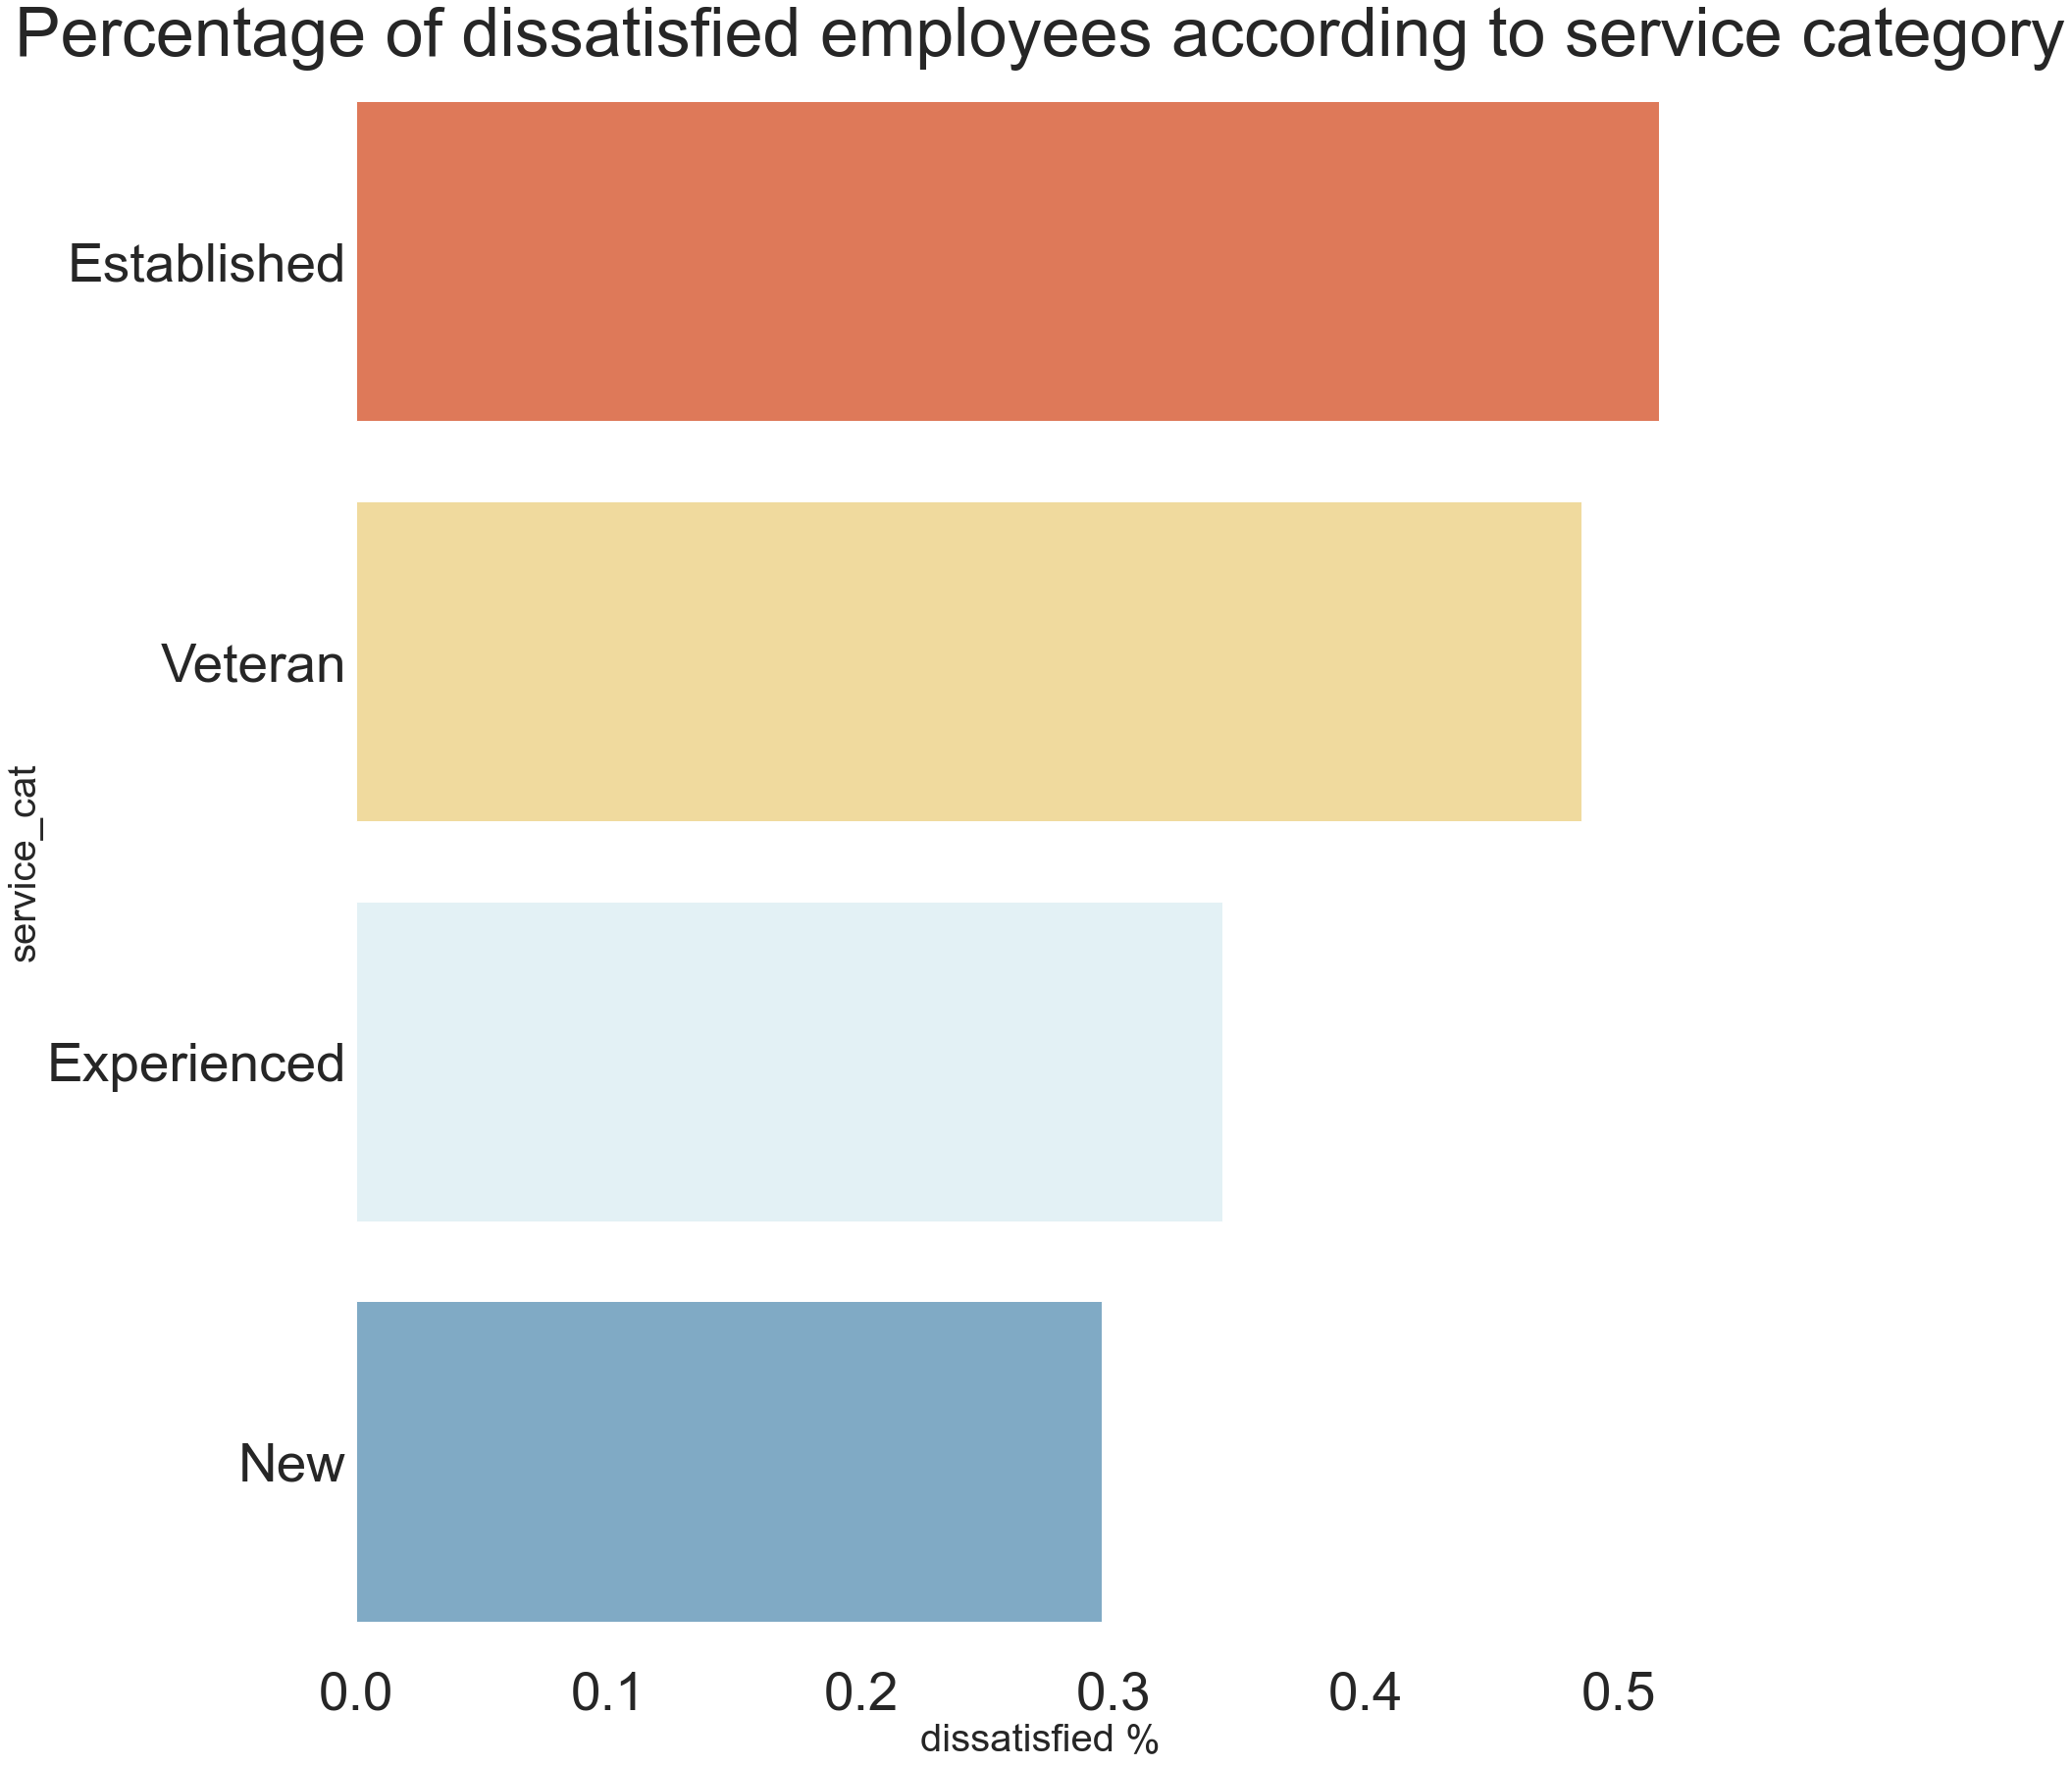

In [74]:
horizontal_bar(dis_scat, "dissatisfied %", "service_cat", None, 
               "Percentage of dissatisfied employees according to service category")

- *'Established'* employees are the most dissatisfied, with **51.6%** on average.
- *'New' employees* are the least dissatisfied, with **29.5%** on average.

## dissatisfied % & age

In [75]:
dis_age = combined_final.pivot_table('dissatisfied', 'age')
table_style(dis_age, 'dissatisfied %', 'age', 'skip').style.background_gradient(cmap=color) 

,age,dissatisfied %
5,60 or older,0.521739
4,50s,0.404762
3,40s,0.379310
1,20s,0.364341
2,30s,0.358209
0,20 or younger,0.200000


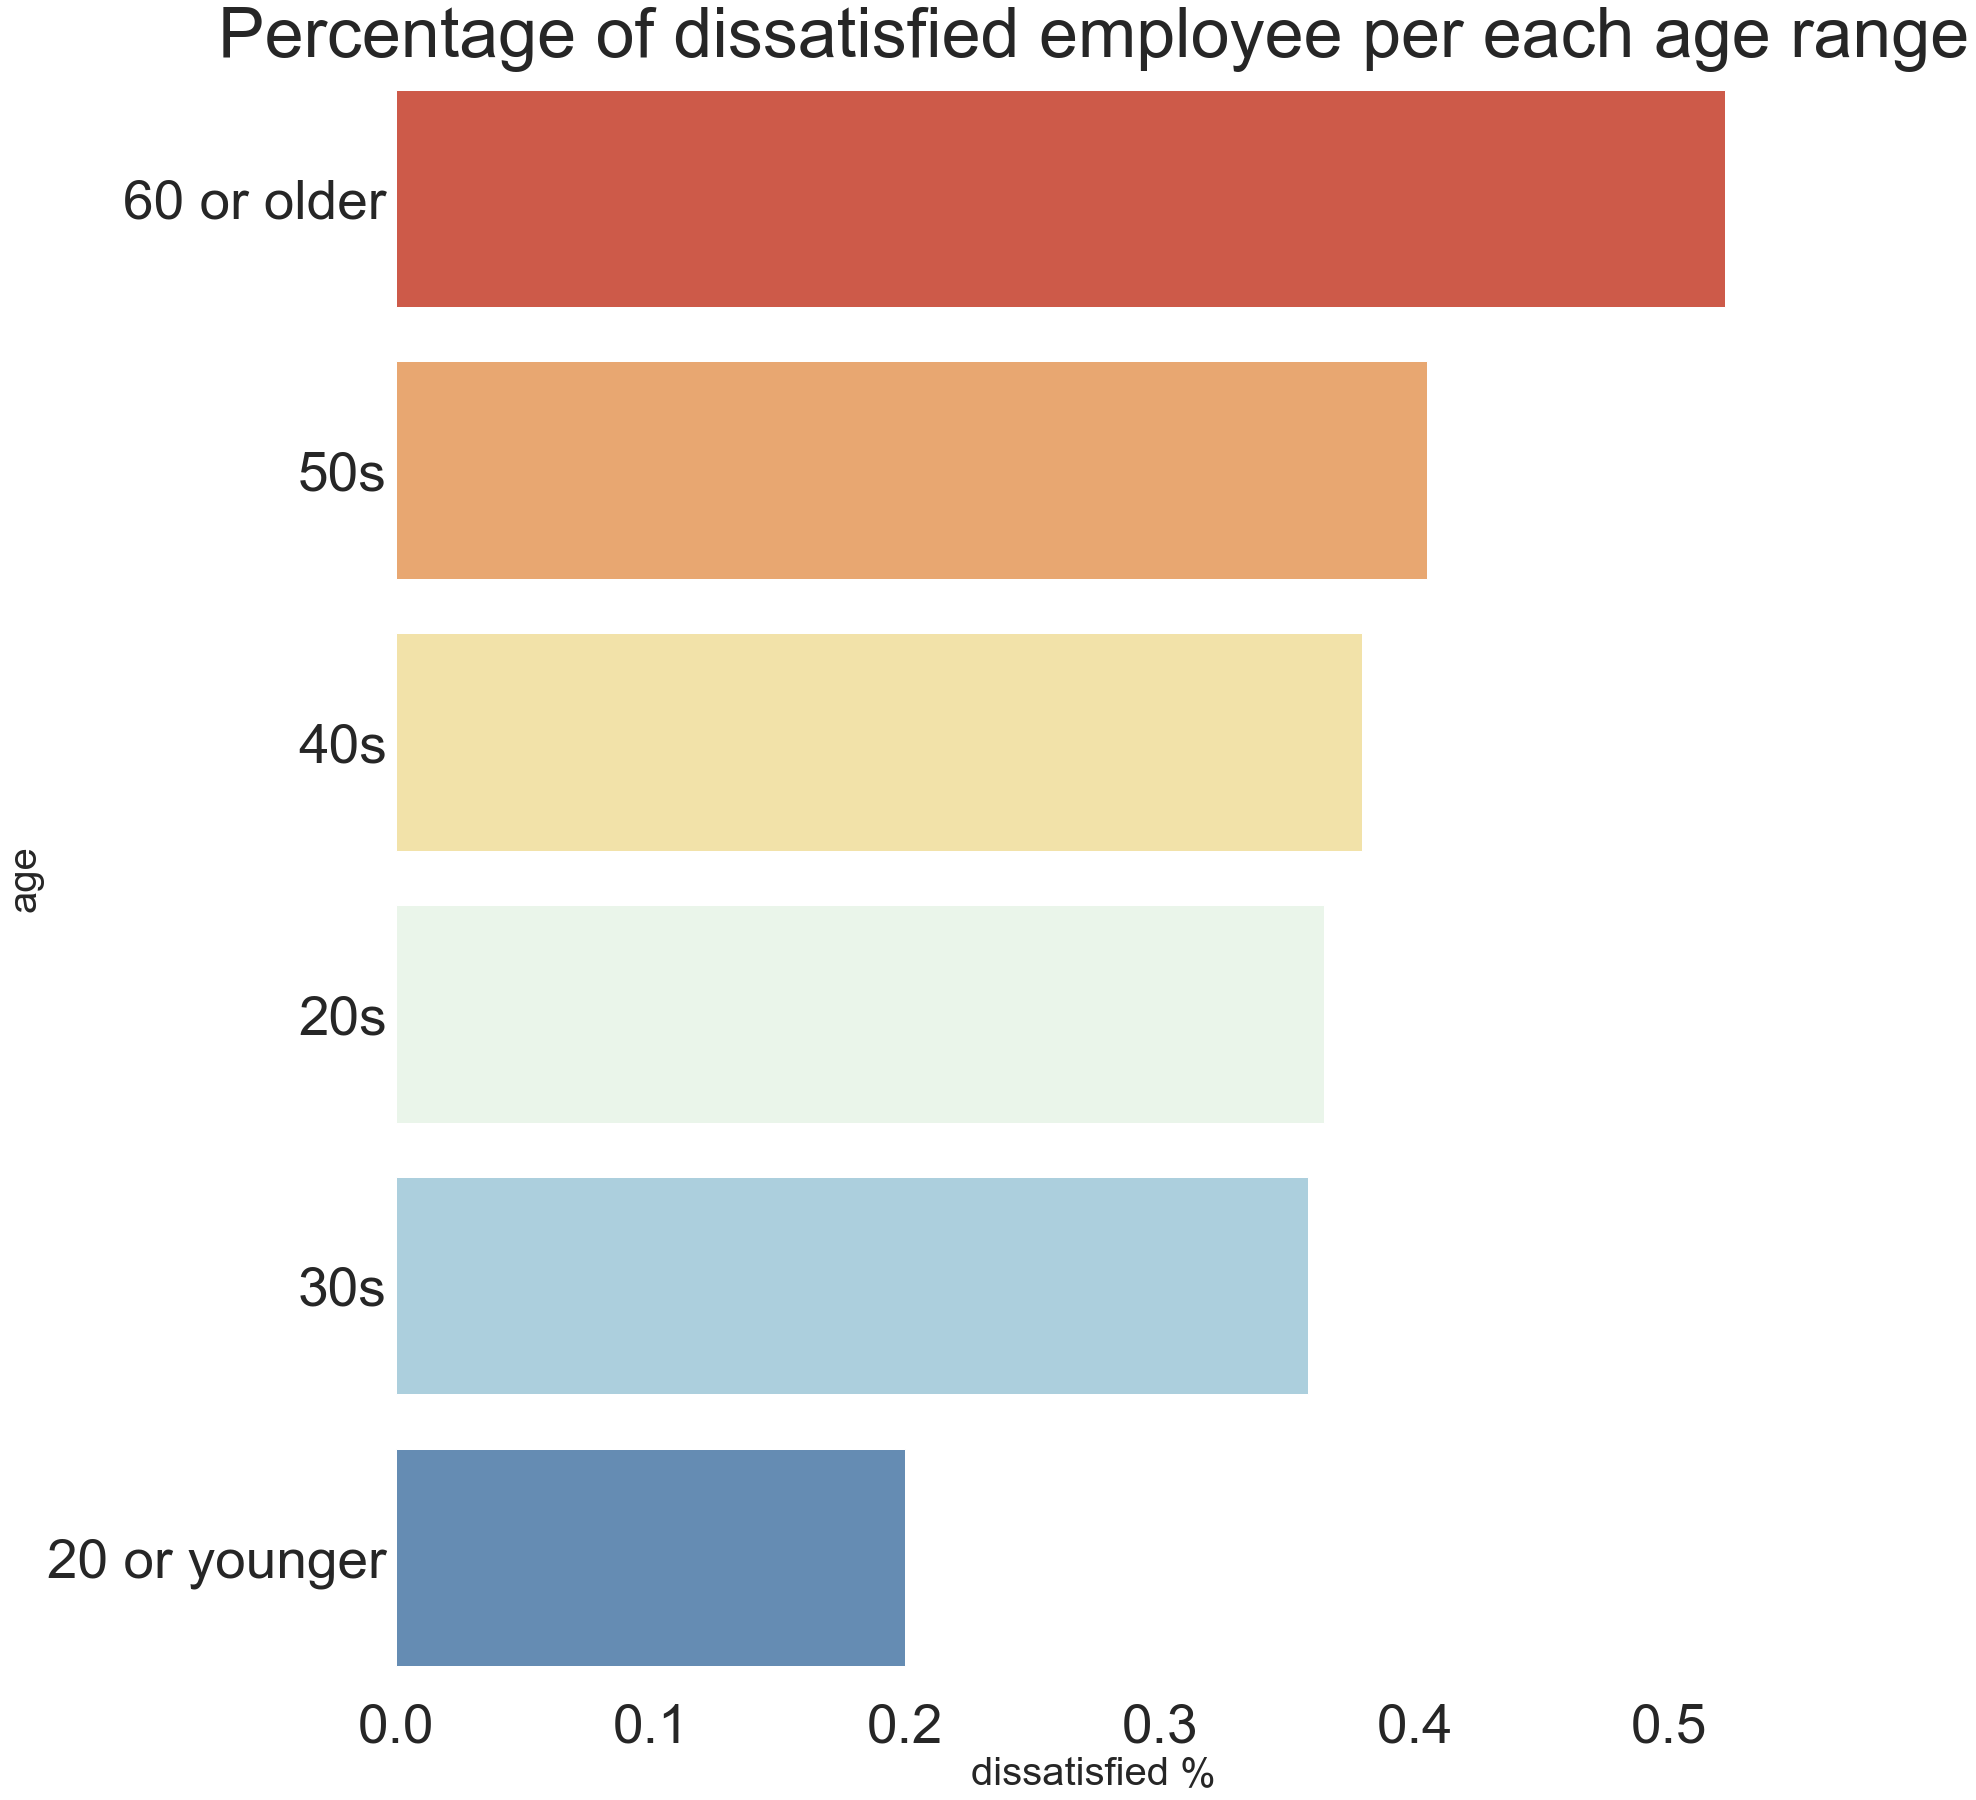

In [76]:
horizontal_bar(dis_age, "dissatisfied %", "age", None, 
               'Percentage of dissatisfied employee per each age range')

*Older employees are more dissatisfied compared to younger employees.**

As an illustration, employees age *60 or older* have *52%* dissatisfied rate, followed by employees age *50s* with *40%* dissatisfied rate. The younger the employees, the least dissatisfied they are. Only *exception:* employees in their 30s are more dissatisfied than employees in their 20s

## dissatisfied % &  separation type

In [77]:
dis_stype = combined_final.pivot_table('dissatisfied', 'separationtype')
table_style(dis_stype, 'dissatisfied %', 'separationtype', 'skip').style.background_gradient(cmap=color) 

,separationtype,dissatisfied %
3,Resignation-Other reasons,0.593333
2,Resignation-Other employer,0.450549
1,Resignation-Move overseas/interstate,0.271429
0,Resignation,0.267647


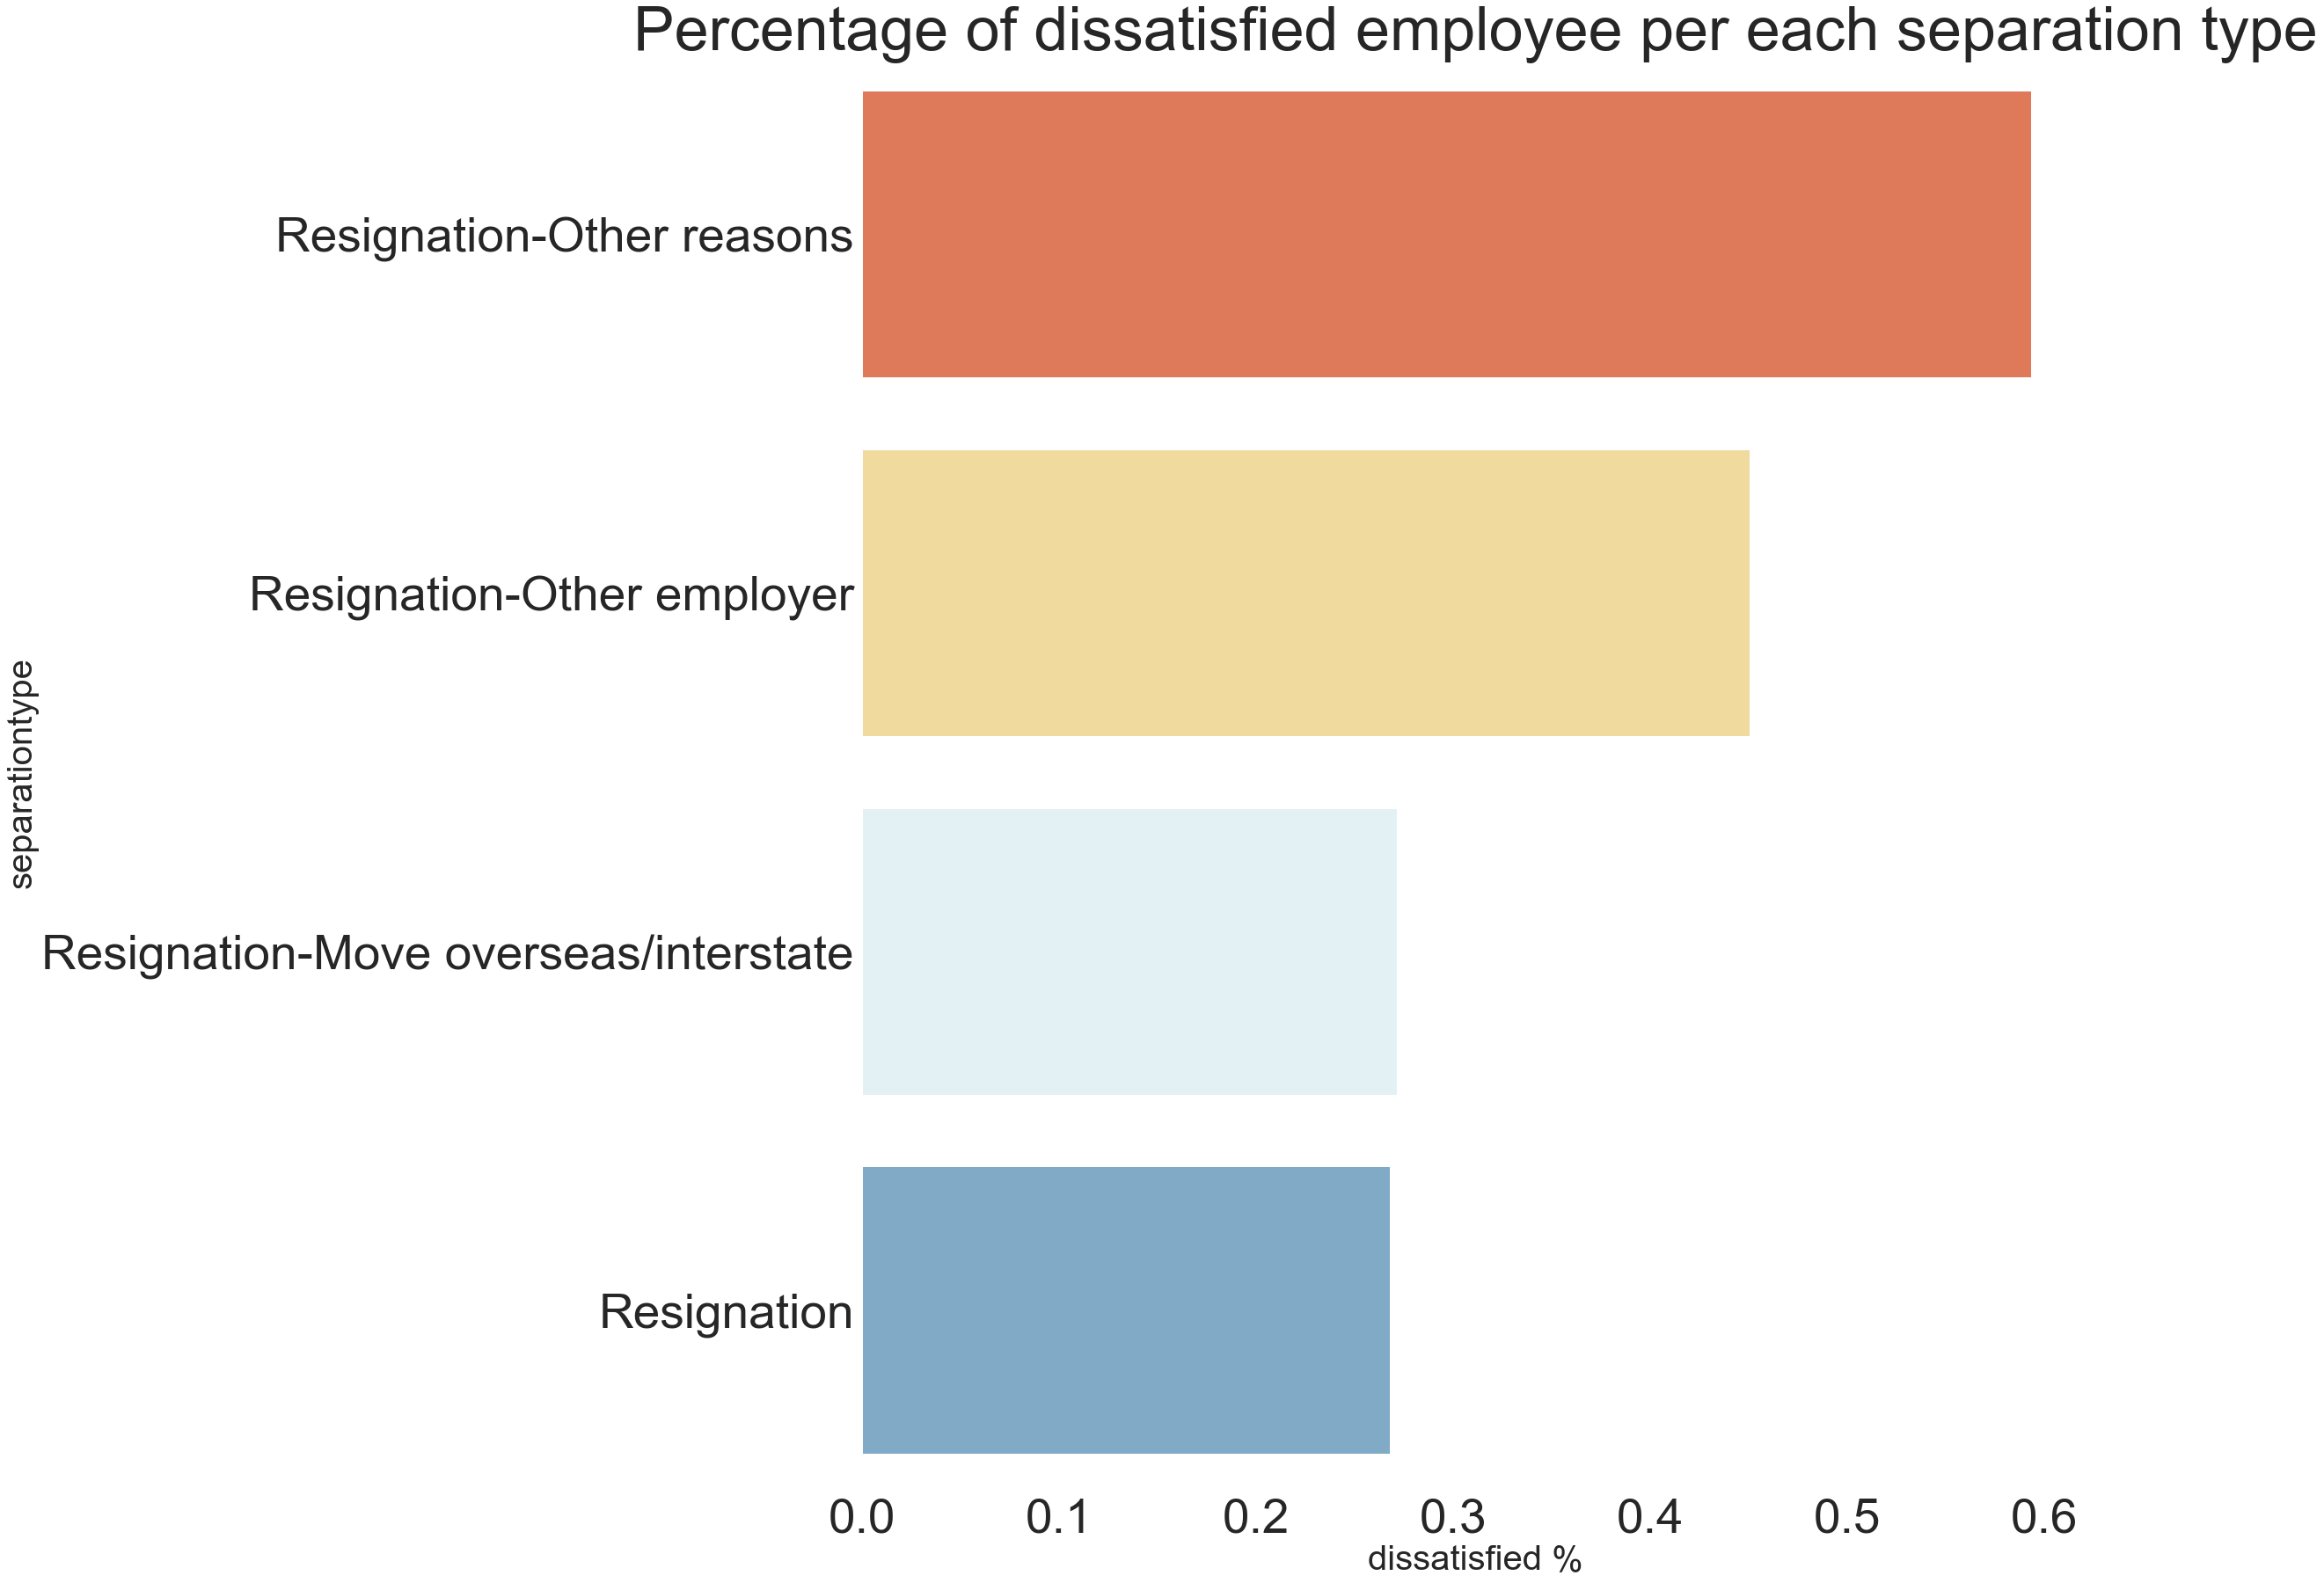

In [78]:
horizontal_bar(dis_stype, "dissatisfied %", "separationtype", None, 
               'Percentage of dissatisfied employee per each separation type')

The *most common separation type* for employees who resigned is *resignation for other reasons*

## dissatisfied % & position

In [79]:
dis_pos = combined_final.pivot_table('dissatisfied', 'position')
table_style(dis_pos, 'dissatisfied %', 'position', 'skip').style.background_gradient(cmap=color) 

,position,dissatisfied %
4,Guidance Officer,1.000000
7,Other,0.666667
10,Public Servant,0.600000
14,Teacher,0.527132
3,Executive (SES/SO),0.500000
5,Head of Curriculum/Head of Special Education,0.500000
2,Cleaner,0.487179
13,Schools Officer,0.428571
18,Technical Officer (TO),0.400000
15,Teacher (including LVT),0.378947


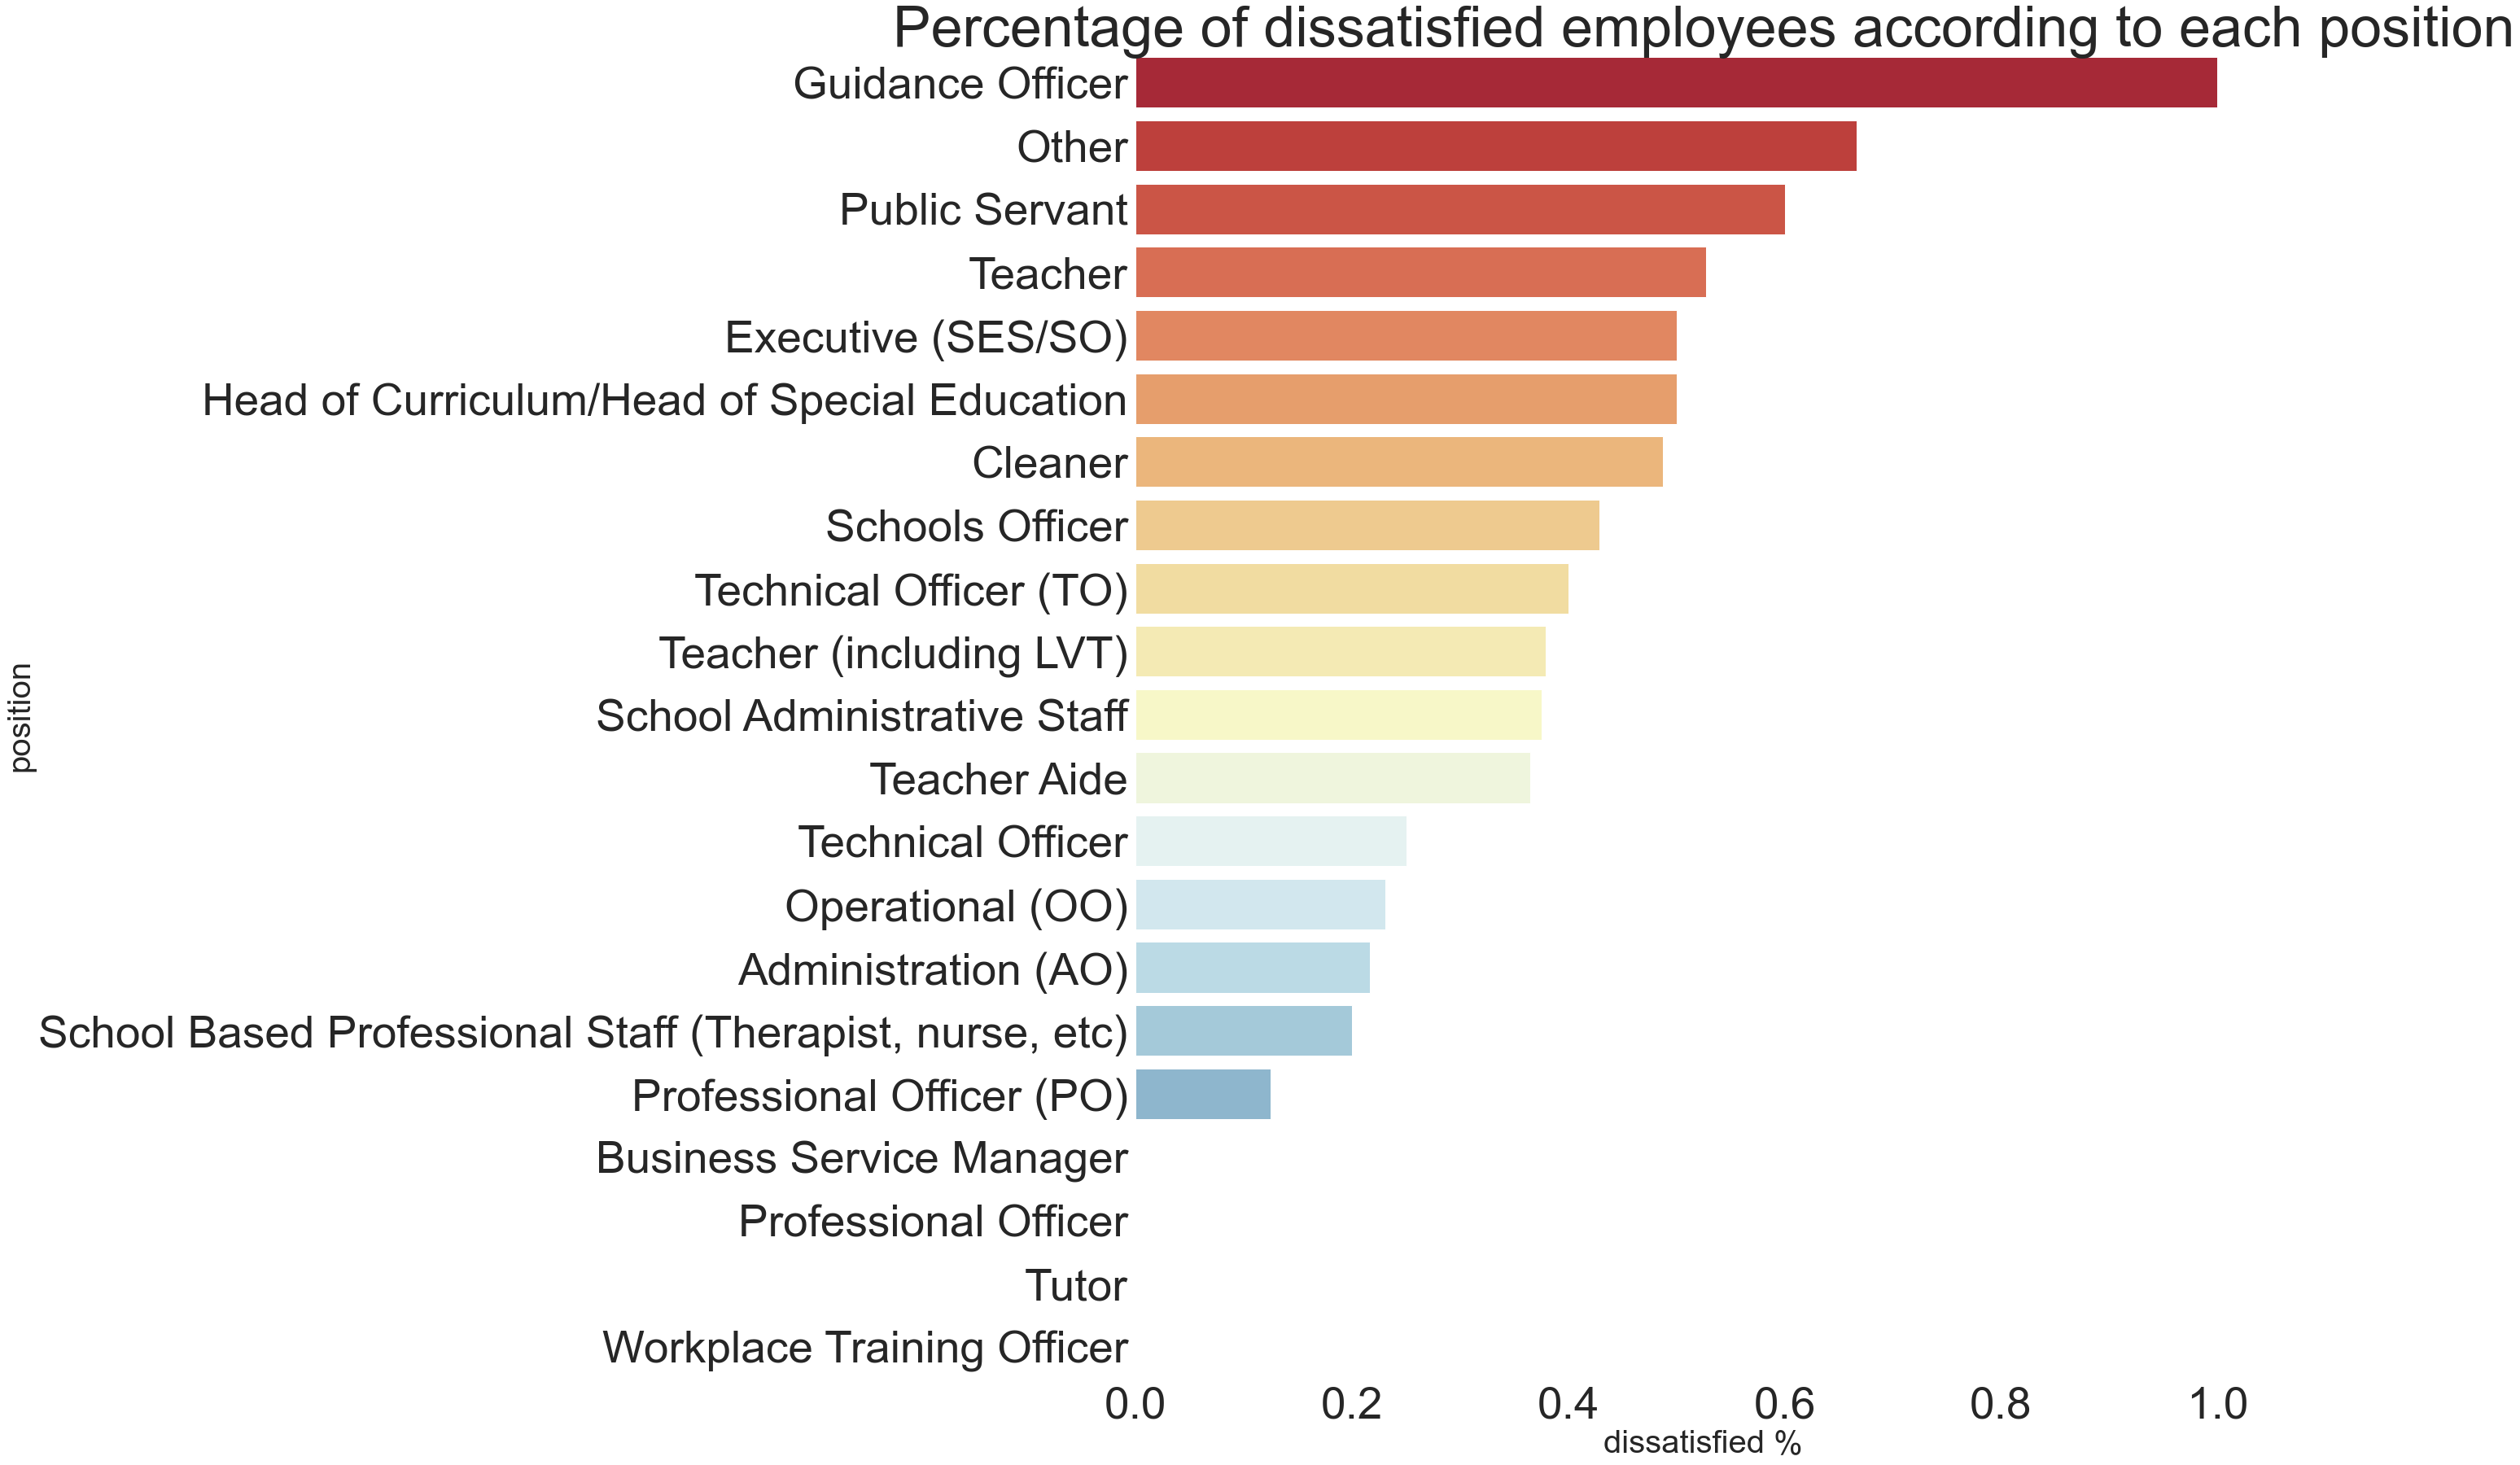

In [80]:
horizontal_bar(dis_pos, "dissatisfied %", "position", None, 
               'Percentage of dissatisfied employees according to each position')

*Top 3 most dissatisfying position:*

In [81]:
dis_pos[dis_pos["dissatisfied %"] >= .59].style.background_gradient(cmap=color) 

,position,dissatisfied %
4,Guidance Officer,1.000000
7,Other,0.666667
10,Public Servant,0.600000


*Positions with 0% dissatisfied rate:*

In [82]:
dis_pos[dis_pos["dissatisfied %"] <= 0]

,position,dissatisfied %
1,Business Service Manager,0.0
8,Professional Officer,0.0
19,Tutor,0.0
20,Workplace Training Officer,0.0


**Our initial analysis is done. We are going to have more analysis in the next section, but before we move on remember that we want to know the following:**

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
2. What about employees who have been there longer?
3. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

**Our analysis in this section have given us the answers, which are:**

1. **'New'** employees are the least dissatisfied, with **29.5%** on average. **Experienced** employees are the second least dissatisfied, with **34%**.
2. **'Established'** employees are the most dissatisfied, with **51.6%** on average. **Veteran** employees are the second most dissatisfied, with **48%**.
3. **Older employees are more dissatisfied compared to younger employees.** 
As an illustration, employees age **60 or older** have **52%** dissatisfied rate, followed by employees age **50s** with **40%** dissatisfied rate. The younger the employees, the least dissatisfied they are. Only ***exception:** employees in their 30s are more dissatisfied than employees in their 20s

We managed to get the answer we wanted, but let's do a few more for fun!


# 11. Data Analysis
---
Let's do a little **recap**. In the previous section, we have done the following:
- Replaced missing values
- Aggregated data:
    - dissatisfied % & service category
    - dissatisfied % & age
    - dissatisfied % & separation type
    - dissatisfied % & position
    
**In this section, we are going to aggregate data for the following columns:**
- dissatisfied %, service category & age
- dissatisfied %, service category & separation type
- dissatisfied %,  position, & service category
- dissatisfied%, age & separation type
- dissatisfied %, position & age
- dissatisfied %, position & separation type

Let's get to it!

## 11.1. dissatisfied %, service category & age

In [83]:
dis_scat_age = combined_final.pivot_table('dissatisfied', ['service_cat', 'age'])
table_style(dis_scat_age, 'dissatisfied %', 'service_cat', 'age').style.background_gradient(cmap=color) 

,service_cat,age,dissatisfied %
19,Veteran,60 or older,0.642857
1,Established,30s,0.590909
17,Veteran,40s,0.521739
4,Established,60 or older,0.500000
0,Established,20s,0.500000
10,Experienced,60 or older,0.500000
18,Veteran,50s,0.482143
2,Established,40s,0.470588
3,Established,50s,0.444444
6,Experienced,20s,0.375000


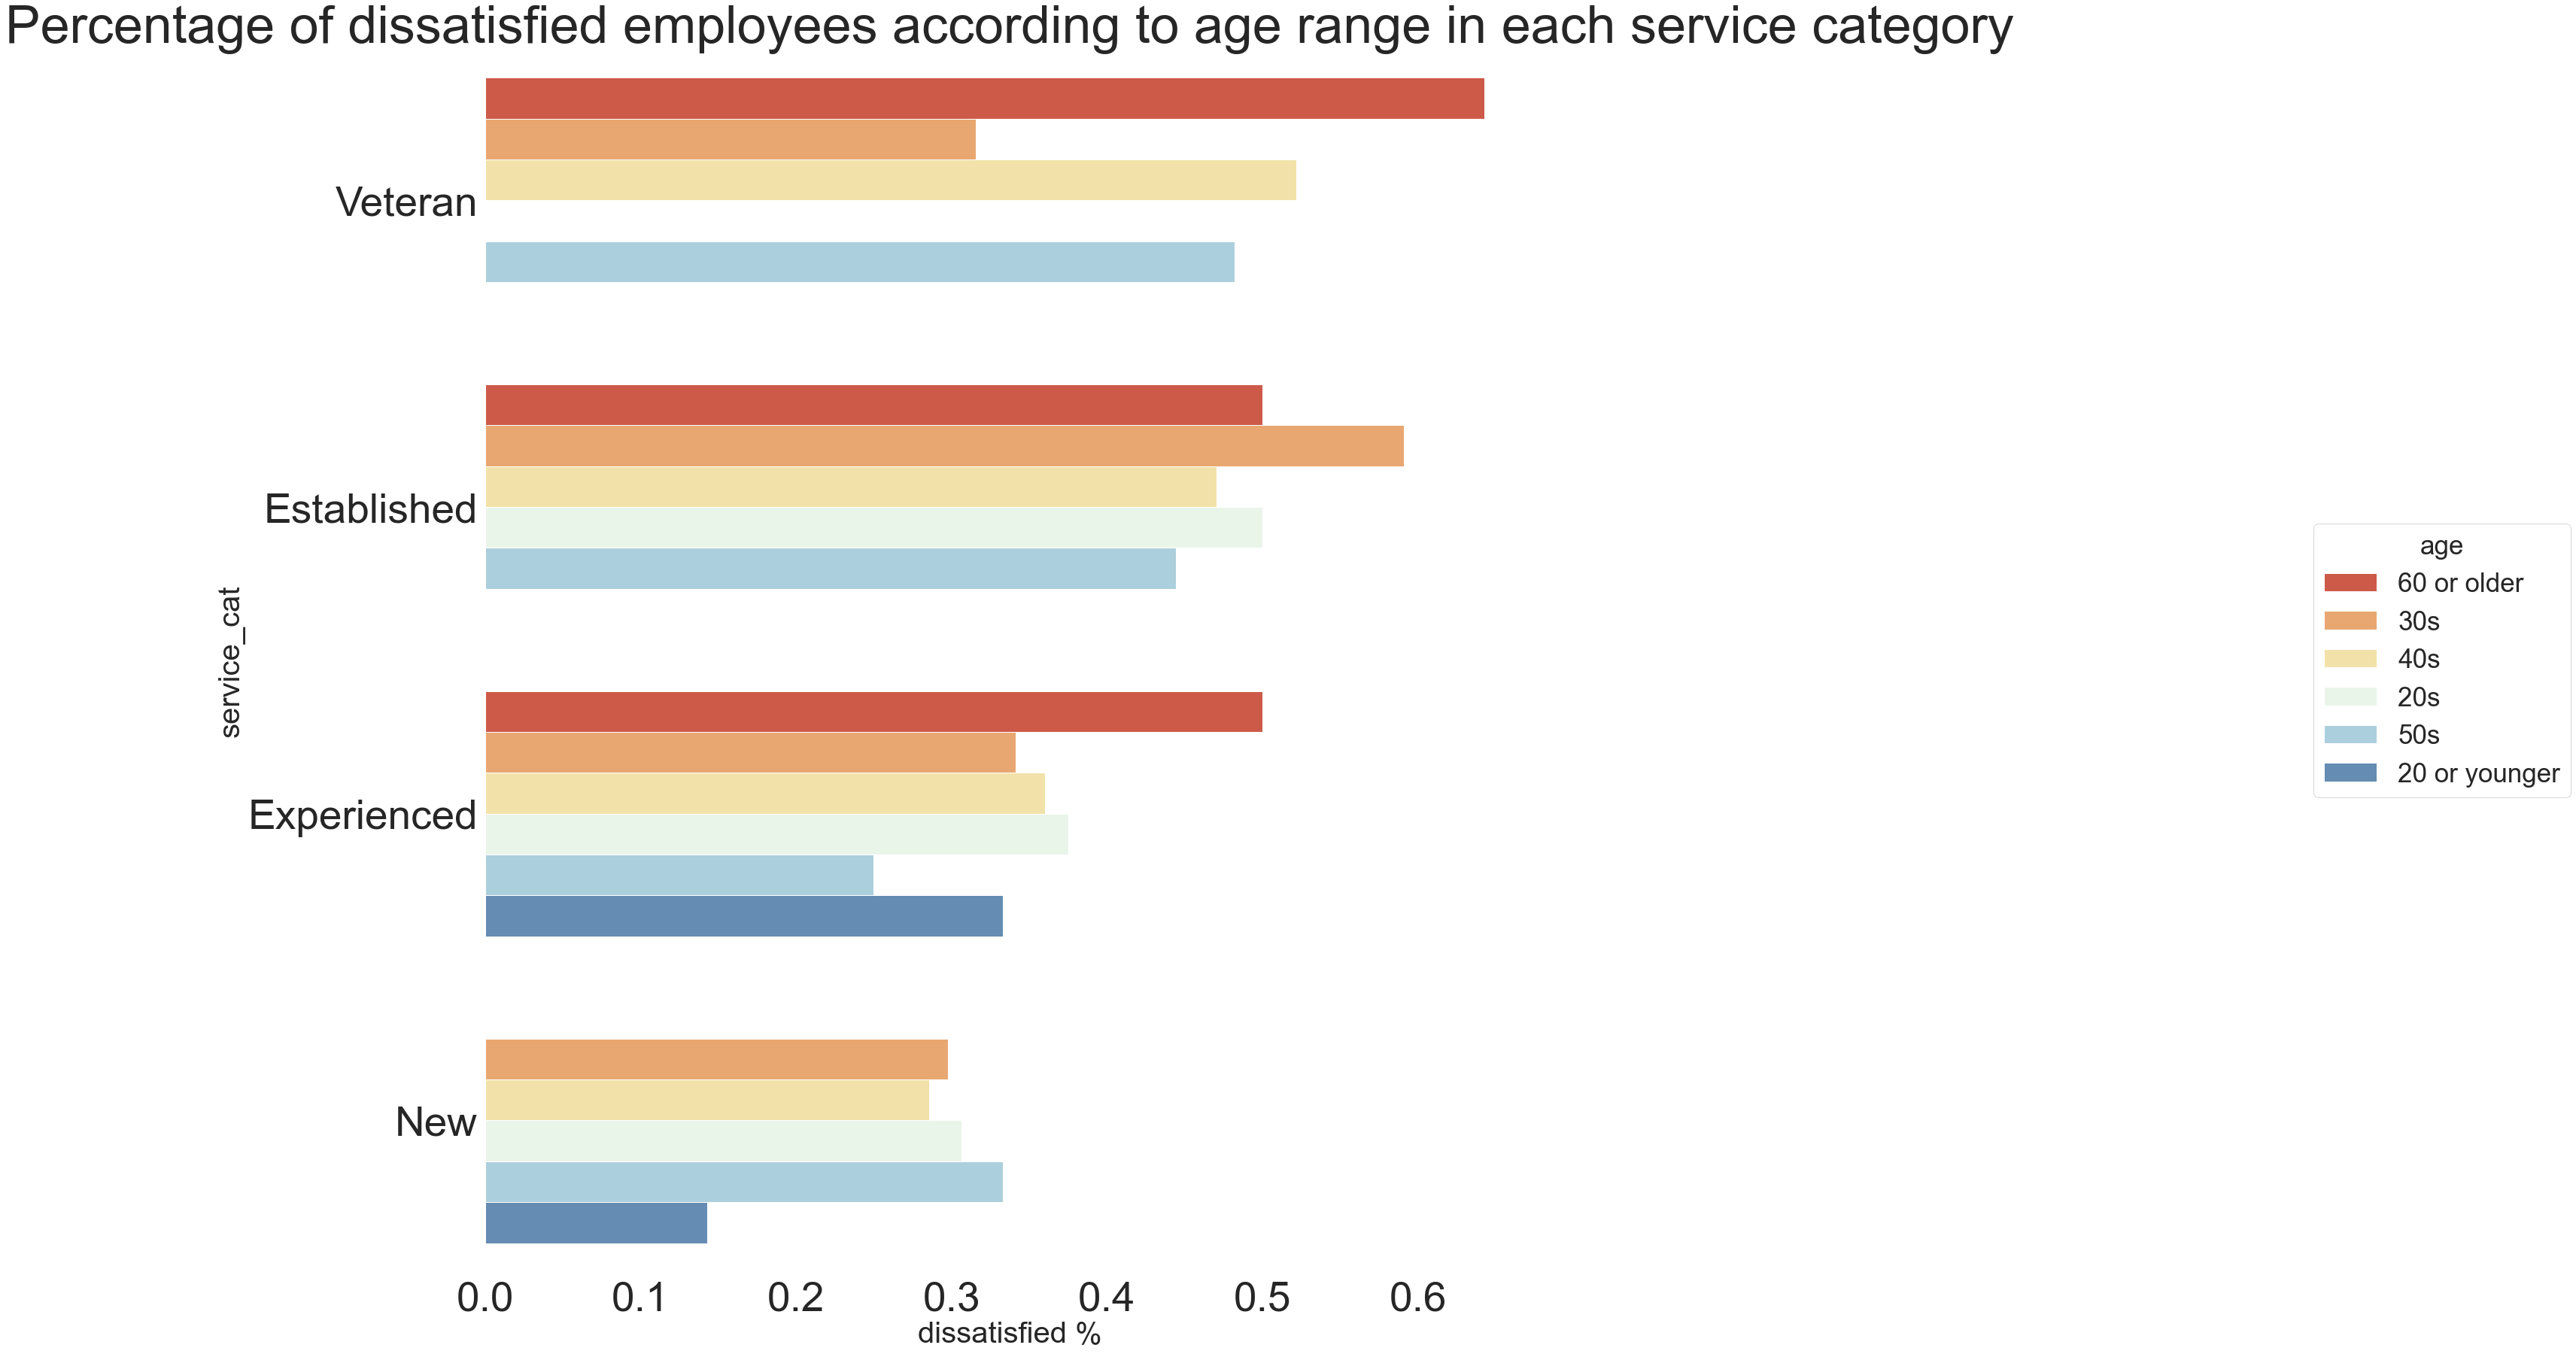

In [84]:
horizontal_bar(dis_scat_age, "dissatisfied %", "service_cat", "age", 
               'Percentage of dissatisfied employees according to age range in each service category')

*Top 3 most dissatisfied types of employees accoding to service category and age range*

In [85]:
dis_scat_age[dis_scat_age["dissatisfied %"] >= .52].sort_values(
                                    by = ["dissatisfied %"] , ascending = False).style.background_gradient(cmap=color)

,service_cat,age,dissatisfied %
19,Veteran,60 or older,0.642857
1,Established,30s,0.590909
17,Veteran,40s,0.521739


*Top 3 most satisfied types of employees accoding to service category and age range*

In [86]:
dis_scat_age[dis_scat_age["dissatisfied %"] <= .29].sort_values(
                                    by = ["dissatisfied %"] , ascending = False).style.background_gradient(cmap=color)

,service_cat,age,dissatisfied %
14,New,40s,0.285714
9,Experienced,50s,0.250000
11,New,20 or younger,0.142857


## 11.2. dissatisfied %,  service category & separation type

In [87]:
dis_scat_stype = combined_final.pivot_table('dissatisfied', ['service_cat', 'separationtype'])
table_style(dis_scat_stype, 'dissatisfied %', 'service_cat', 'separationtype').style.background_gradient(cmap=color) 

,service_cat,separationtype,dissatisfied %
3,Established,Resignation-Other reasons,0.850000
15,Veteran,Resignation-Other reasons,0.655738
7,Experienced,Resignation-Other reasons,0.566667
6,Experienced,Resignation-Other employer,0.565217
2,Established,Resignation-Other employer,0.461538
14,Veteran,Resignation-Other employer,0.433333
11,New,Resignation-Other reasons,0.409091
10,New,Resignation-Other employer,0.357143
9,New,Resignation-Move overseas/interstate,0.350000
0,Established,Resignation,0.333333


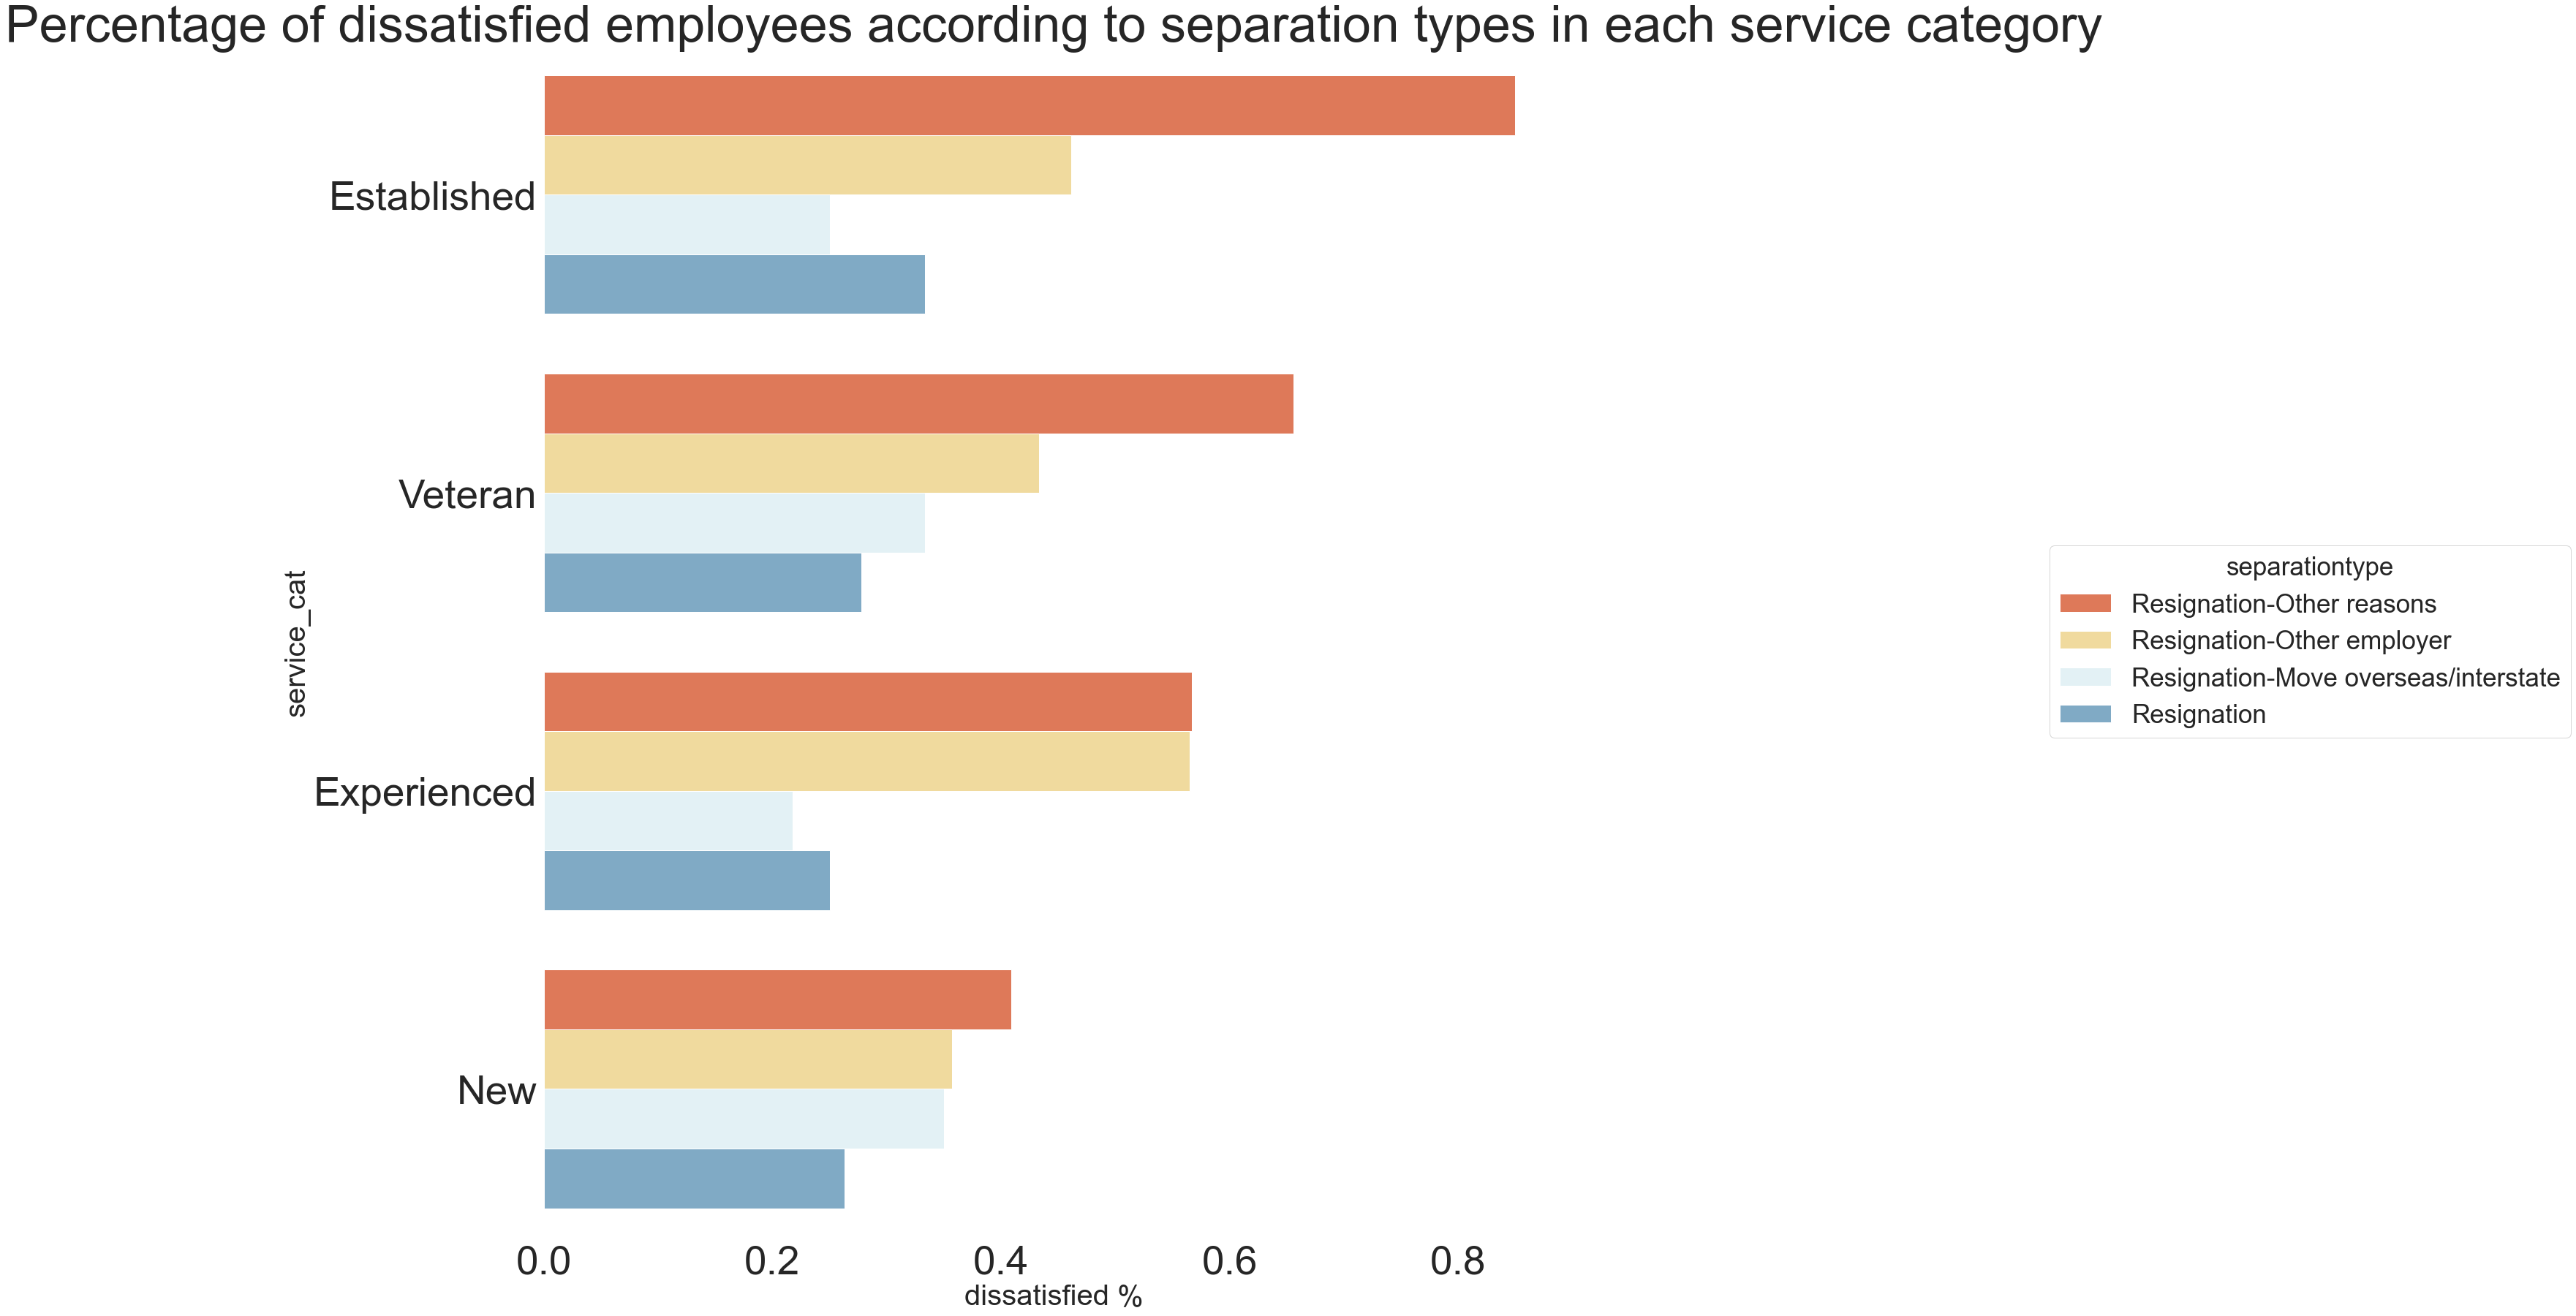

In [88]:
horizontal_bar(dis_scat_stype, "dissatisfied %", "service_cat", "separationtype", 
               "Percentage of dissatisfied employees according to separation types in each service category")

As we know from our previous analysis, *the majority of dissatisfied employees resign due to 'other reasons'*. 

However, it's interesting to see that *Established employees* who Resigned for Other reasons have *85% dissatisfied rate*, while *new employees* who resigned for Other reasons have *41% dissatisfied rate*. 

If we only focus on the percentage, that is a big difference!

## 11.3. dissatisfied %,  position, & service category

In [89]:
dis_pos_scat = combined_up.pivot_table('dissatisfied', ['position', 'service_cat'])
table_style(dis_pos_scat, 'dissatisfied %', 'position', 'service_cat').style.background_gradient(cmap=color) 

,position,service_cat,dissatisfied %
12,Head of Curriculum/Head of Special Education,Established,1.000000
38,Schools Officer,Experienced,1.000000
37,Schools Officer,Established,1.000000
23,Professional Officer (PO),Established,1.000000
20,Other,Veteran,1.000000
9,Executive (SES/SO),Experienced,1.000000
19,Other,New,1.000000
11,Guidance Officer,Veteran,1.000000
27,Public Servant,Established,0.800000
28,Public Servant,Experienced,0.750000


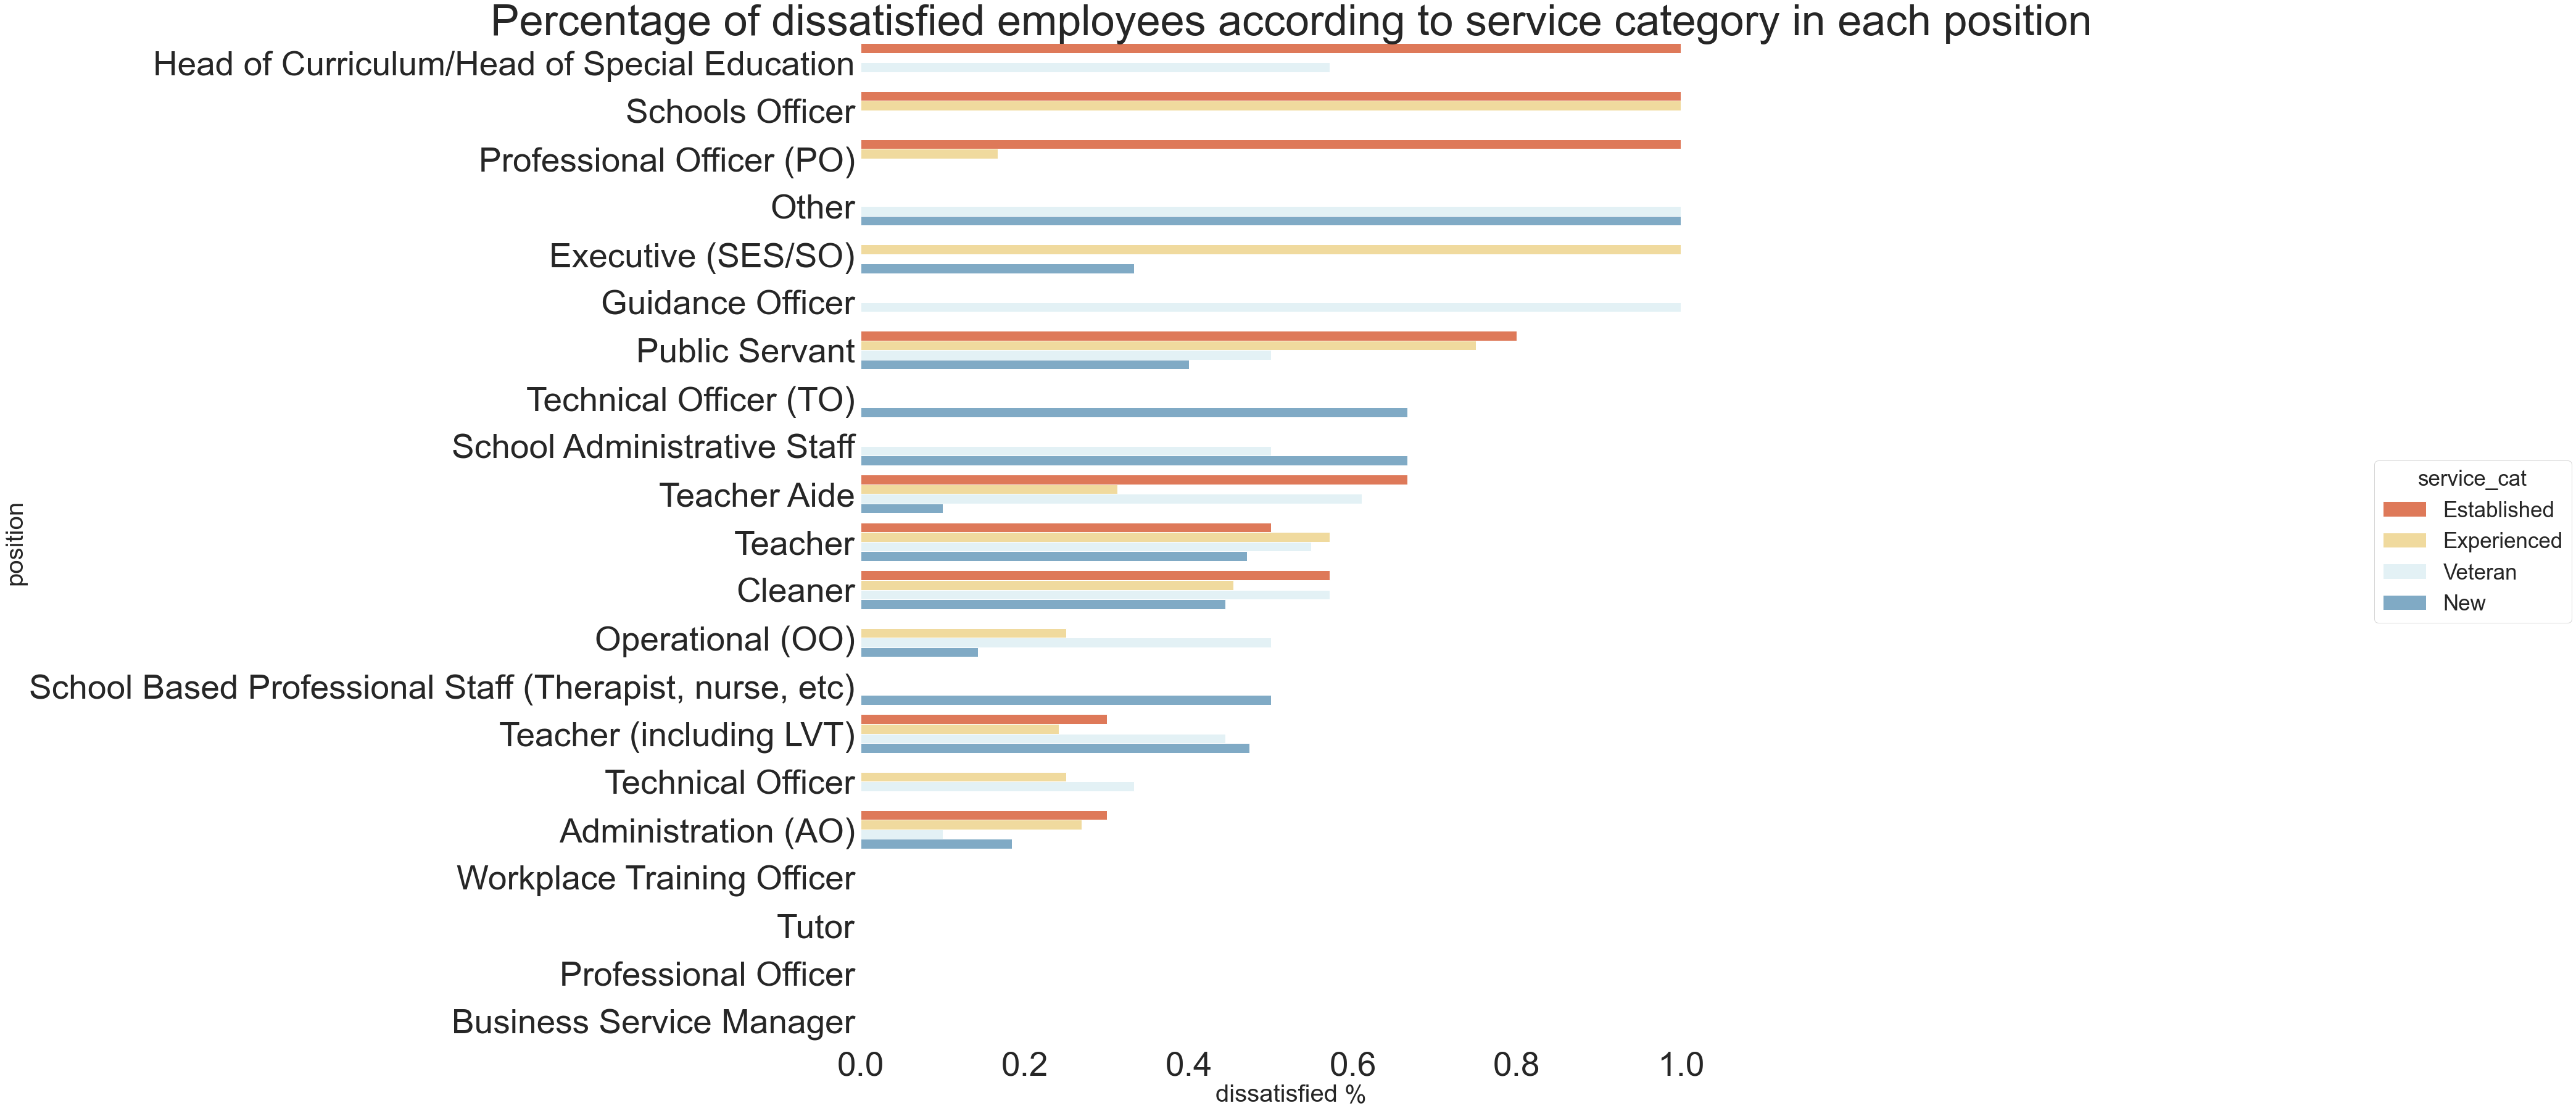

In [90]:
horizontal_bar(dis_pos_scat, "dissatisfied %", "position", "service_cat", 
               'Percentage of dissatisfied employees according to service category in each position')

It's interesting to see that *a few positions have 100% dissatisfaction rate.* Let's check whether the 100% translates to a lot of people, or just a few.

**Displaying rows with 100% dissatisfaction rate**

In [91]:
#displaying rows that has 100% dissatisfaction rate
dis_pos_scat[dis_pos_scat["dissatisfied %"] >= 1]

,position,service_cat,dissatisfied %
9,Executive (SES/SO),Experienced,1.0
11,Guidance Officer,Veteran,1.0
12,Head of Curriculum/Head of Special Education,Established,1.0
19,Other,New,1.0
20,Other,Veteran,1.0
23,Professional Officer (PO),Established,1.0
37,Schools Officer,Established,1.0
38,Schools Officer,Experienced,1.0


**pivot table with `aggfunc = np.sum`**

In [92]:
#to check how many people does 100% on the dis_scat_pos translate to

dis_pos_scat_sum = combined_final.pivot_table('dissatisfied', ['position', 'service_cat'], aggfunc = np.sum)
color = sns.light_palette("salmon", as_cmap=True)
dis_pos_scat_sum.reset_index(inplace=True) #need to reset index to create plot using seaborn
dis_pos_scat_sum = dis_pos_scat_sum.sort_values(by = 'dissatisfied', ascending = False)
dis_pos_scat_sum.columns=['service_cat','position','dissatisfied']
dis_pos_scat_sum.style.background_gradient(cmap= color) 

,service_cat,position,dissatisfied
44,Teacher,Veteran,28
47,Teacher (including LVT),New,18
42,Teacher,Experienced,16
2,Administration (AO),New,14
1,Administration (AO),Experienced,14
52,Teacher Aide,Veteran,11
41,Teacher,Established,10
48,Teacher (including LVT),Veteran,8
43,Teacher,New,8
46,Teacher (including LVT),Experienced,7


*The 100% dissatisfaction rate that we found on `dis_scat_pos` pivot table translates to 1-2 people per position, except for veteran Head of Curriculum/Head of Special Education, which has 4 people.*

It appears that the *positions with 100% dissatisfied rate are mostly the more exclusive, high ranking positions.*

## 11.4. dissatisfied %, position & age

In [93]:
dis_pos_age = combined_final.pivot_table('dissatisfied', ['position', 'age'])
table_style(dis_pos_age, 'dissatisfied %', 'position', 'age').style.background_gradient(cmap=color) 

,position,age,dissatisfied %
63,Technical Officer (TO),20s,1.000000
24,Other,60 or older,1.000000
33,Public Servant,40s,1.000000
23,Other,30s,1.000000
17,Head of Curriculum/Head of Special Education,50s,1.000000
12,Executive (SES/SO),40s,1.000000
13,Guidance Officer,40s,1.000000
14,Head of Curriculum/Head of Special Education,20s,1.000000
57,Teacher Aide,60 or older,0.666667
42,Schools Officer,40s,0.666667


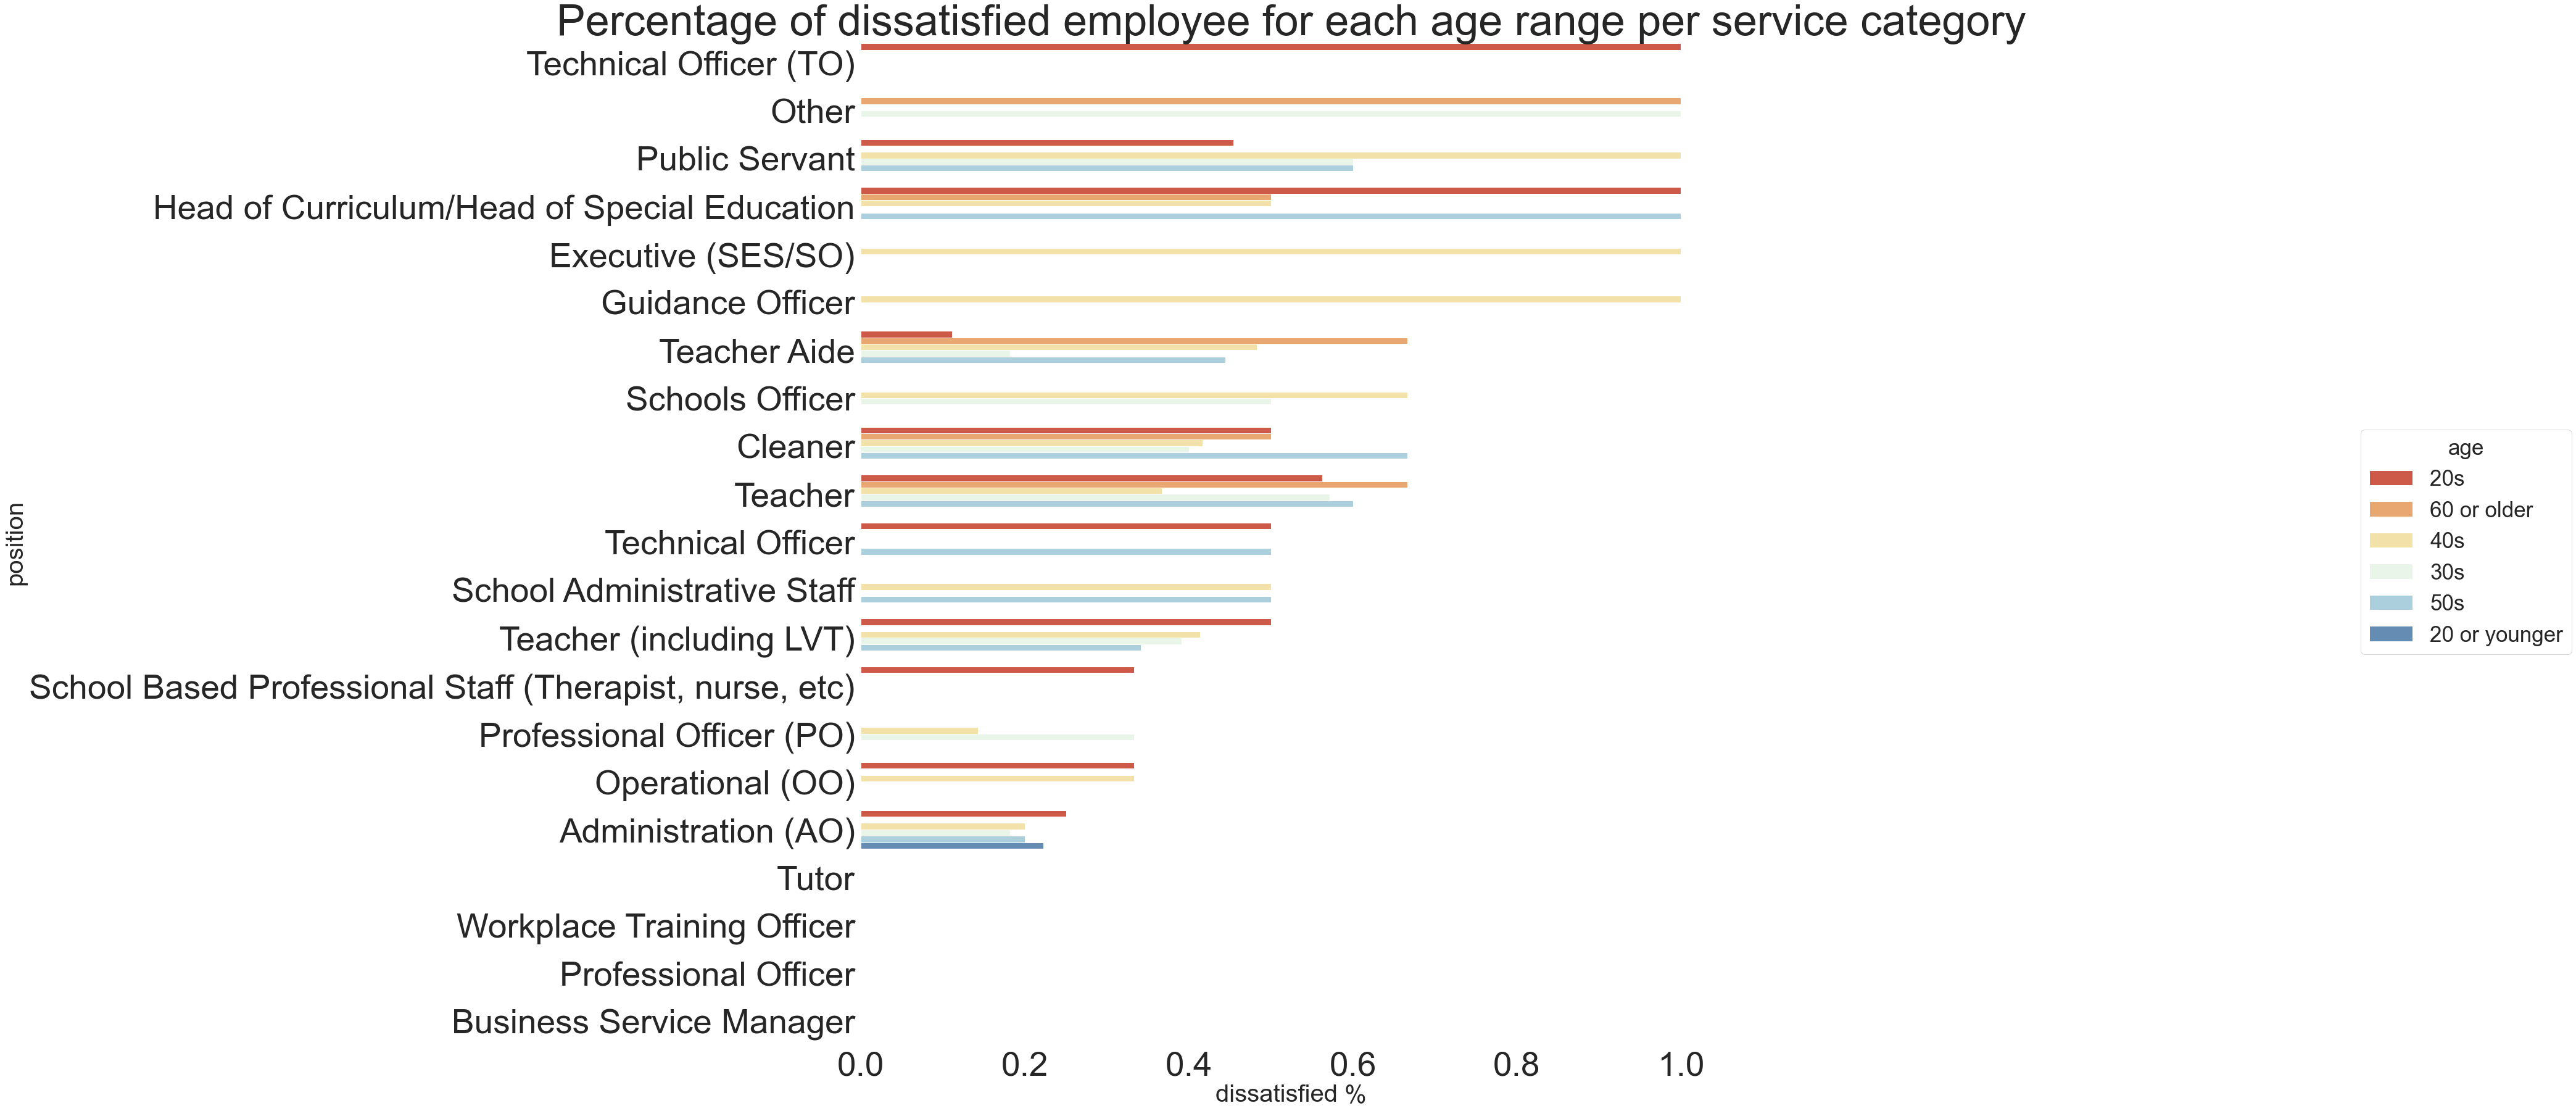

In [94]:
horizontal_bar(dis_pos_age, "dissatisfied %", "position", "age", 
               'Percentage of dissatisfied employee for each age range per service category')

*Positions with 100% dissatisfied rate according to age range:*

In [95]:
dis_pos_age[dis_pos_age['dissatisfied %'] == 1]

,position,age,dissatisfied %
12,Executive (SES/SO),40s,1.0
13,Guidance Officer,40s,1.0
14,Head of Curriculum/Head of Special Education,20s,1.0
17,Head of Curriculum/Head of Special Education,50s,1.0
23,Other,30s,1.0
24,Other,60 or older,1.0
33,Public Servant,40s,1.0
63,Technical Officer (TO),20s,1.0


*Positions with 0% dissatisfied rate according to age range:*

In [96]:
dis_pos_age[dis_pos_age['dissatisfied %'] == 0]

,position,age,dissatisfied %
5,Business Service Manager,40s,0.0
11,Executive (SES/SO),30s,0.0
15,Head of Curriculum/Head of Special Education,30s,0.0
21,Operational (OO),50s,0.0
22,Other,20s,0.0
25,Professional Officer,20s,0.0
26,Professional Officer,50s,0.0
27,Professional Officer (PO),20s,0.0
30,Professional Officer (PO),50s,0.0
35,School Administrative Staff,20 or younger,0.0


*Similar to a few of our previous findings, there a few positions with 100% disatisfied rate. Let's further analyze these rows*

In [97]:
#to check how many people does 100% on the dis_pos_age translate to

dis_pos_age_sum = combined_final.pivot_table('dissatisfied', ['position', 'age'], aggfunc = np.sum)
color = sns.light_palette("salmon", as_cmap=True)
dis_pos_age_sum.reset_index(inplace=True) #need to reset index to create plot using seaborn
dis_pos_age_sum = dis_pos_age_sum.sort_values(by = 'dissatisfied', ascending = False)
dis_pos_age_sum.columns=['position','age','dissatisfied']
dis_pos_age_sum.style.background_gradient(cmap= color) 

,position,age,dissatisfied
45,Teacher,30s,20
44,Teacher,20s,18
47,Teacher,50s,15
55,Teacher Aide,40s,14
52,Teacher (including LVT),50s,14
1,Administration (AO),20s,14
51,Teacher (including LVT),40s,12
46,Teacher,40s,11
50,Teacher (including LVT),30s,9
3,Administration (AO),40s,7


Out of all positions with 100% dissatisfied rate according to age range, *Public Servant that are in their 40s* tops the list with *4 people*.

## 11.5. dissatisfied %, position & separation type

In [98]:
dis_pos_stype = combined_final.pivot_table('dissatisfied', ['position', 'separationtype'])
table_style(dis_pos_stype, 'dissatisfied %', 'position', 'separationtype').style.background_gradient(cmap=color) 

,position,separationtype,dissatisfied %
25,Schools Officer,Resignation-Other employer,1.000000
13,Other,Resignation-Other reasons,1.000000
6,Guidance Officer,Resignation-Move overseas/interstate,1.000000
7,Guidance Officer,Resignation-Other reasons,1.000000
10,Head of Curriculum/Head of Special Education,Resignation-Other reasons,1.000000
19,Public Servant,Resignation-Other reasons,0.750000
29,Teacher,Resignation-Other reasons,0.661017
4,Cleaner,Resignation-Other reasons,0.615385
3,Cleaner,Resignation-Other employer,0.600000
18,Public Servant,Resignation-Other employer,0.571429


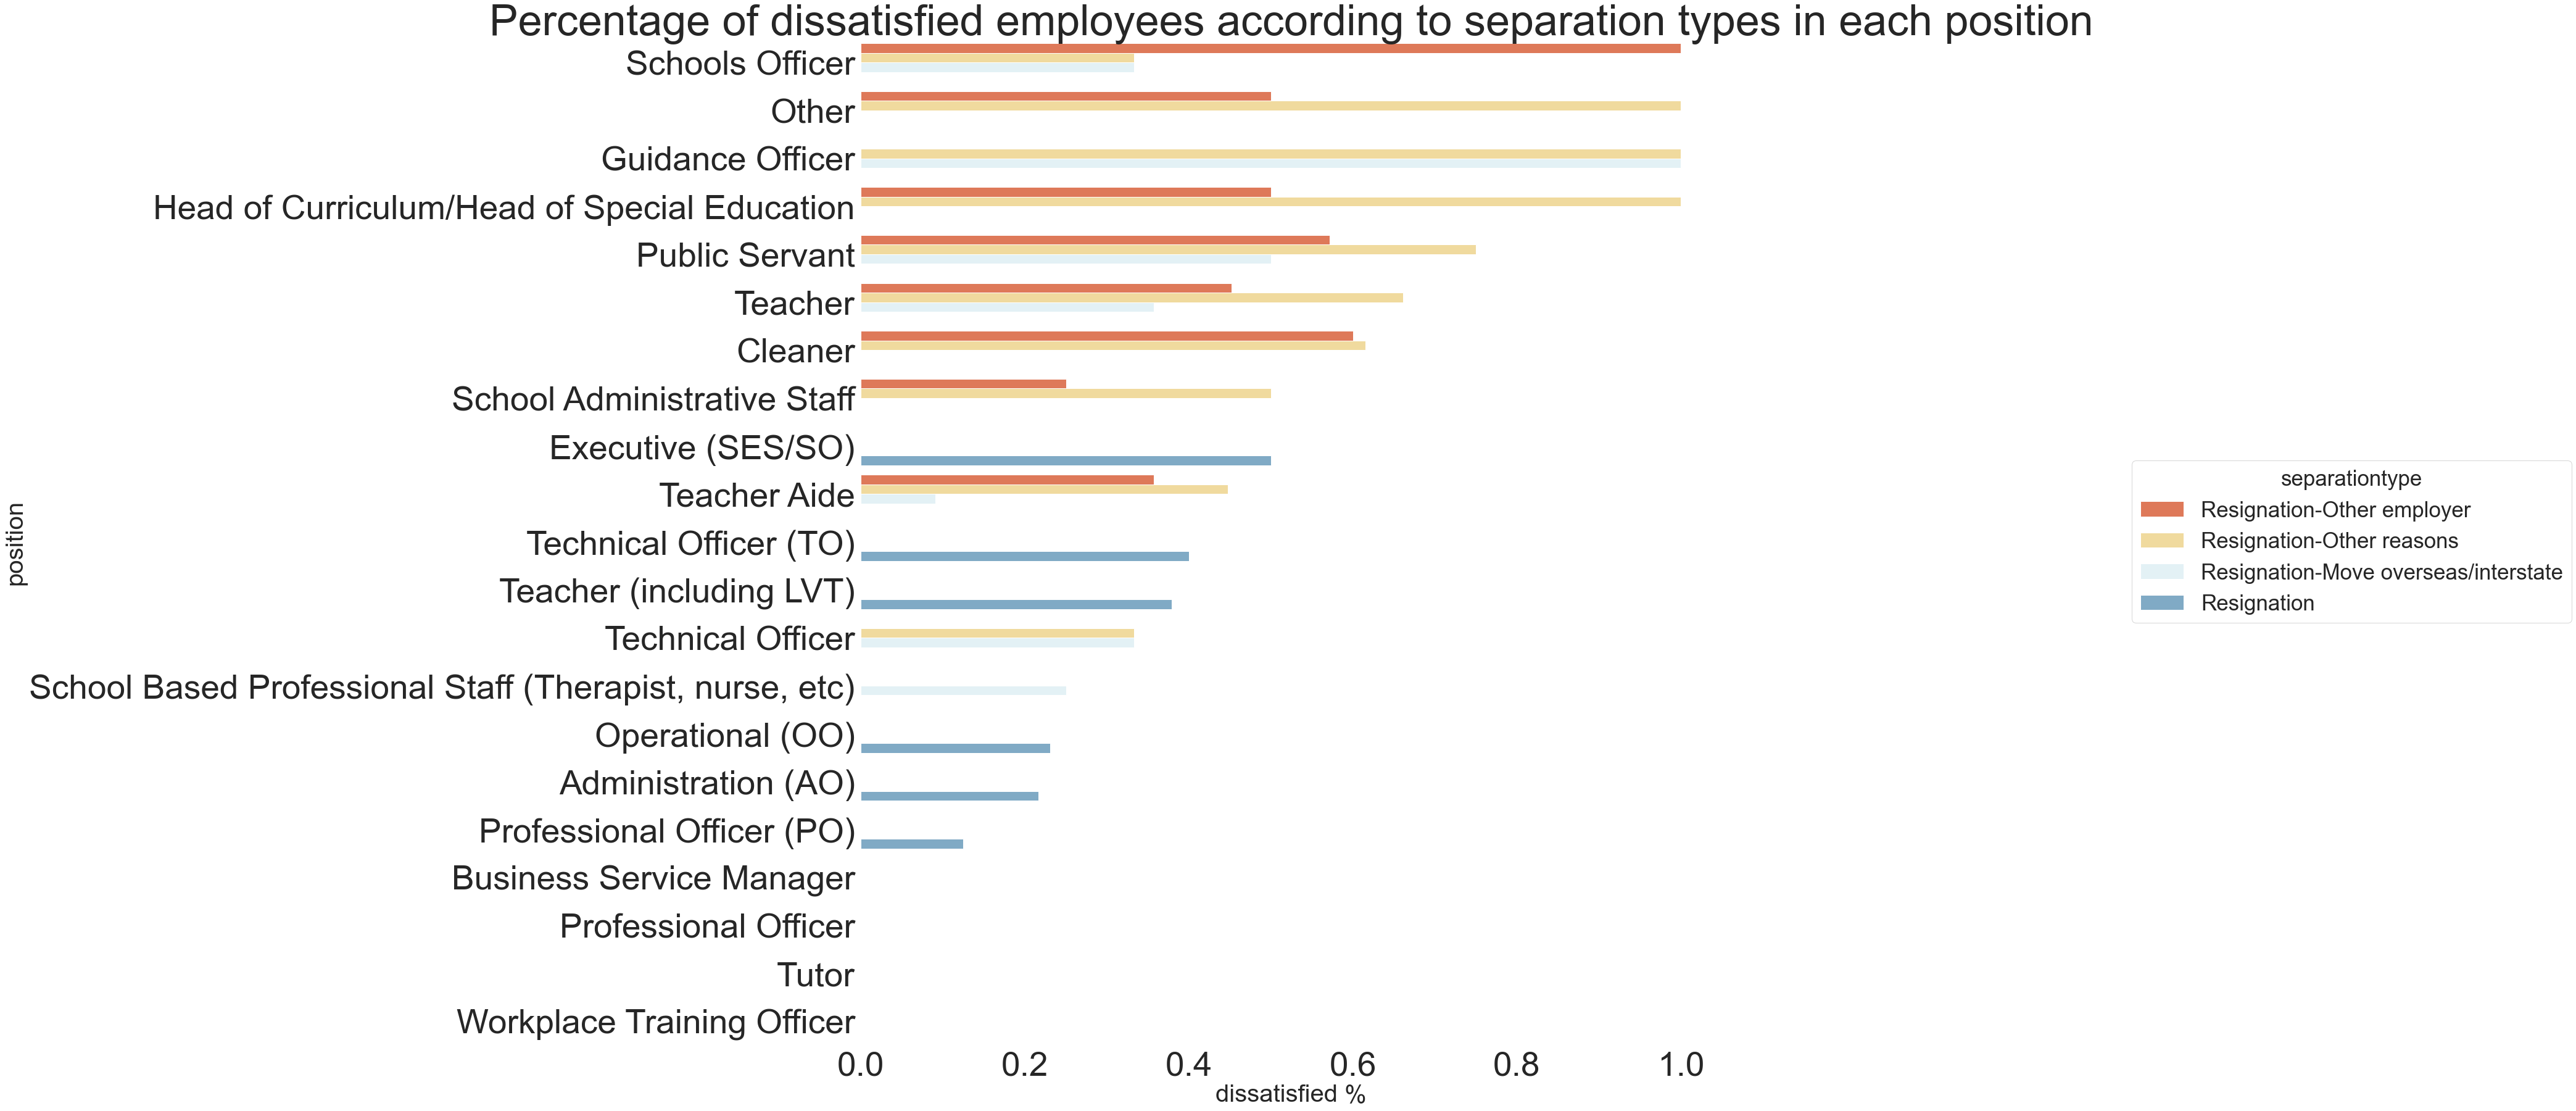

In [99]:
horizontal_bar(dis_pos_stype, "dissatisfied %", "position", "separationtype", 
               'Percentage of dissatisfied employees according to separation types in each position')

*Positions with 100% dissatisfied rate according to separation types:*

In [100]:
dis_pos_stype[dis_pos_stype["dissatisfied %"] >= 1]

,position,separationtype,dissatisfied %
6,Guidance Officer,Resignation-Move overseas/interstate,1.0
7,Guidance Officer,Resignation-Other reasons,1.0
10,Head of Curriculum/Head of Special Education,Resignation-Other reasons,1.0
13,Other,Resignation-Other reasons,1.0
25,Schools Officer,Resignation-Other employer,1.0


*Positions with 0% dissatisfied rate according to separation types:*

In [101]:
dis_pos_stype[dis_pos_stype["dissatisfied %"] <= 0]

,position,separationtype,dissatisfied %
1,Business Service Manager,Resignation-Other reasons,0.0
2,Cleaner,Resignation-Move overseas/interstate,0.0
8,Head of Curriculum/Head of Special Education,Resignation-Move overseas/interstate,0.0
14,Professional Officer,Resignation-Move overseas/interstate,0.0
15,Professional Officer,Resignation-Other employer,0.0
23,"School Based Professional Staff (Therapist, nu...",Resignation-Other reasons,0.0
35,Technical Officer,Resignation-Other employer,0.0
38,Tutor,Resignation,0.0
39,Workplace Training Officer,Resignation,0.0


*Similar to our findings in the dissatisfied %, service category, and position analysis, there a few positions with 100% disatisfied rate. Let's further analyze these rows*

In [102]:
#to check how many people does 100% on the dis_pos_stype translate to

dis_pos_stype_sum = combined_final.pivot_table('dissatisfied', ['position', 'separationtype'], aggfunc = np.sum)
color = sns.light_palette("salmon", as_cmap=True)
dis_pos_stype_sum.reset_index(inplace=True) #need to reset index to create plot using seaborn
dis_pos_stype_sum = dis_pos_stype_sum.sort_values(by = 'dissatisfied', ascending = False)
dis_pos_stype_sum.columns=['position','separationtype','dissatisfied']
dis_pos_stype_sum.style.background_gradient(cmap= color) 

,position,separationtype,dissatisfied
29,Teacher,Resignation-Other reasons,39
30,Teacher (including LVT),Resignation,36
0,Administration (AO),Resignation,32
28,Teacher,Resignation-Other employer,19
33,Teacher Aide,Resignation-Other reasons,17
4,Cleaner,Resignation-Other reasons,16
27,Teacher,Resignation-Move overseas/interstate,10
18,Public Servant,Resignation-Other employer,8
19,Public Servant,Resignation-Other reasons,6
32,Teacher Aide,Resignation-Other employer,5


Out of all positions with 100% dissatisfied rate, *Heads of Curriculum/ Heads of Special Education that resign to work other employer come out on top with 3 people.*

*Alright alright alright*, now we are done with our analysis. Let's recap on what we have done in our analysis. 

*In chapter 10 and 11, we have done the following:*

- Replaced missing values
- Aggregated data:
    - dissatisfied % & service category
    - dissatisfied % & age
    - dissatisfied % & separation type
    - dissatisfied % & position
    - dissatisfied %, service category & age
    - dissatisfied %, service category & separation type
    - dissatisfied %, service category & position
    - dissatisfied%, age & separation type
    - dissatisfied %, age & position
    - dissatisfied %, separation type & position

## 11.6. dissatisfied%, age &  separation type

In [103]:
dis_age_stype = combined_final.pivot_table('dissatisfied', ['age', 'separationtype'])
table_style(dis_age_stype, 'dissatisfied %', 'age', 'separationtype').style.background_gradient(cmap=color) 

,age,separationtype,dissatisfied %
19,60 or older,Resignation-Other employer,1.000000
17,50s,Resignation-Other reasons,0.648649
20,60 or older,Resignation-Other reasons,0.647059
9,30s,Resignation-Other reasons,0.586207
13,40s,Resignation-Other reasons,0.585366
5,20s,Resignation-Other reasons,0.565217
8,30s,Resignation-Other employer,0.500000
15,50s,Resignation-Move overseas/interstate,0.500000
16,50s,Resignation-Other employer,0.461538
4,20s,Resignation-Other employer,0.450000


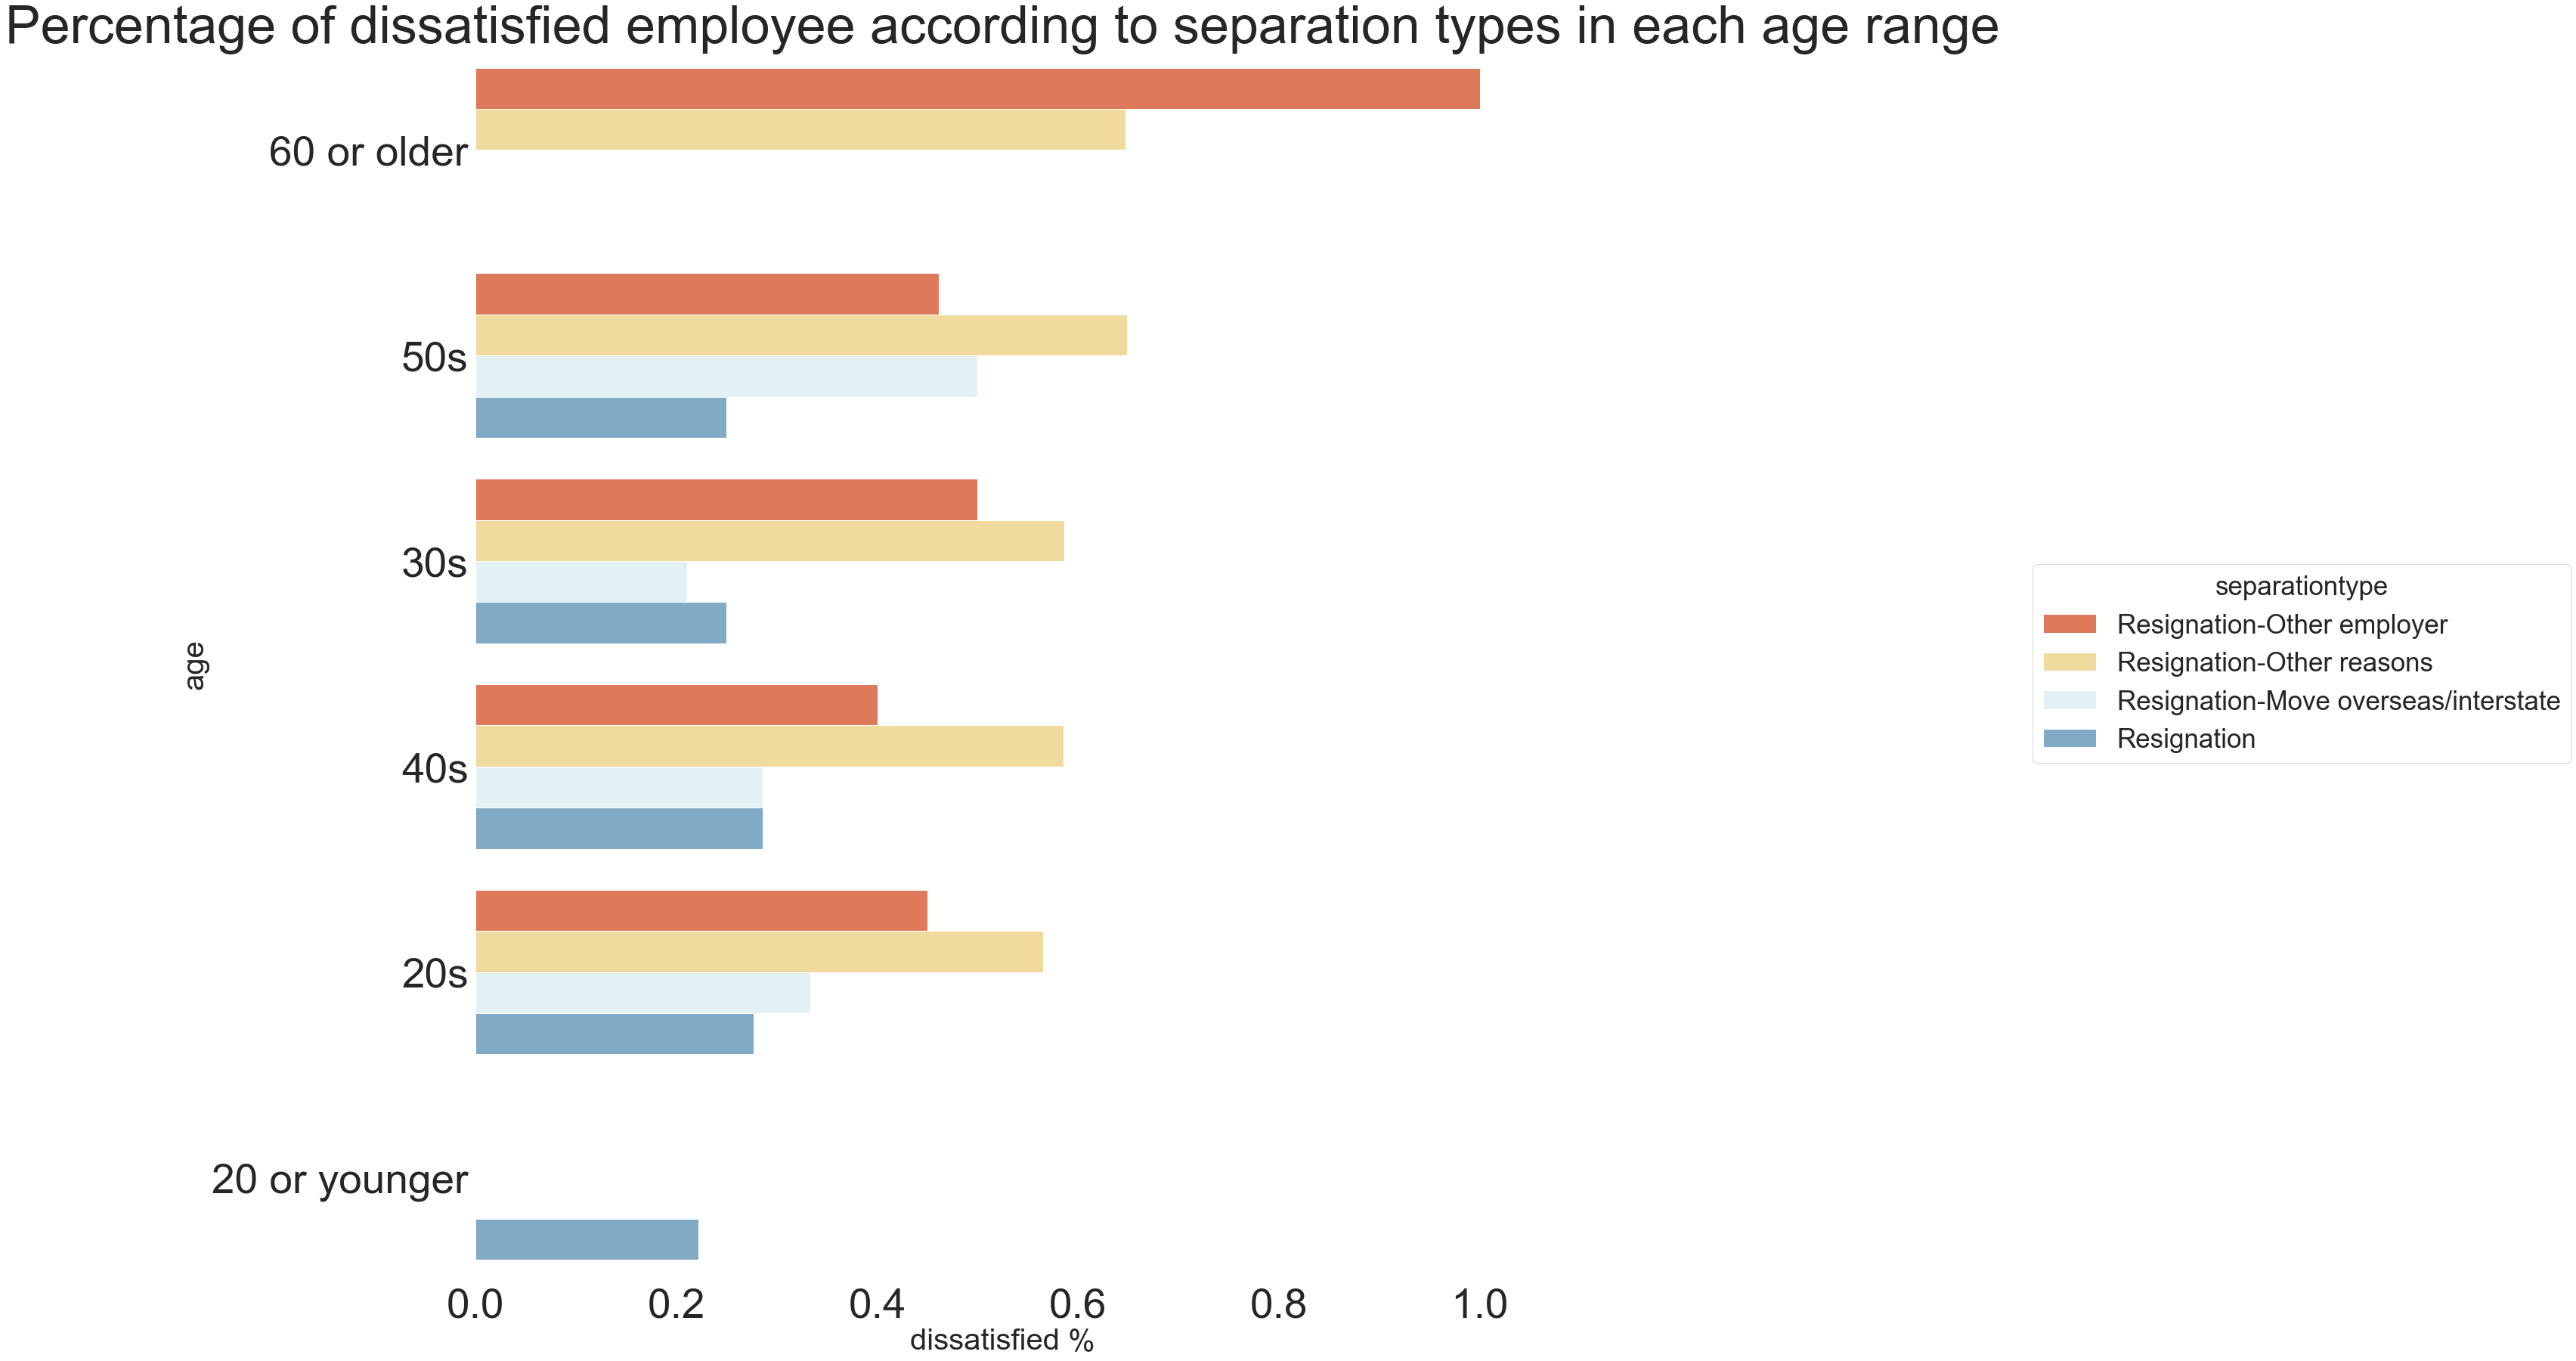

In [104]:
horizontal_bar(dis_age_stype, "dissatisfied %", "age", "separationtype", 
               'Percentage of dissatisfied employee according to separation types in each age range')

Every employee who are in the *age of 60* and *resigned to work for other employer* are *dissatisfied* in some way.

# 12. Conclusion & Insights
---

**In the beginning of our analysis, we want to know the following:**

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
2. What about employees who have been there longer?
3. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

**We managed to find the answers to the question from our analysis in chapter 10, and the answers are:**

1. **'New'** employees are the least dissatisfied, with **29.5%** on average. **Experienced** employees are the second least dissatisfied, with **34%**.
2. **'Established'** employees are the most dissatisfied, with **51.6%** on average. **Veteran** employees are the second most dissatisfied, with **48%**.
3. **Older employees are more dissatisfied compared to younger employees.** 
As an illustration, employees age **60 or older** have **52%** dissatisfied rate, followed by employees age **50s** with **40%** dissatisfied rate. The younger the employees, the least dissatisfied they are. Only ***exception:** employees in their 30s are more dissatisfied than employees in their 20s

**In Chapter 11, we managed to do more analysis, and here is what we found:**

- The **most common separation type** for employees who resigned is **resignation for other reasons**

- **Top 3 most dissatisfying position:**
    - Guidance officer, with 100% dissatisfaction rate
    - Other, with 67% dissatisfacation rate
    - Public servant, with 60% dissatisfacation rate

- **Positions with 0% dissatisfied rate:**
    - Business Service Manager
    - Professional officer
    - Tutor
    - Workplace training officer

- **Top 3 most dissatisfied types of employees accoding to service category and age range**
    - Veteran employees at the age of 60 or older, with 65% dissatisfied rate
    - Established employees at the age of 30s, with 59% dissatisfied rate
    - Veteran employees at the age of 40s, with 52% dissatisfied rate

- **Top 3 most satisfied types of employees accoding to service category and age range**
    - New employees at the age of 40s, with 29% dissatisfied rate
    - Experienced employees at the age of 50s, with 25% dissatisfied rate
    - New employees at the age of 20 or youngere, with 14% dissatisfied rate

- It appears that the **positions with 100% dissatisfied rate are mostly the more exclusive, high ranking positions.**

- **Positions with 100% dissatisfied rate according to age range:**
    - Executive (SES/SO) age 40s
    - Guidance Officer age 40s
    - Head of Curriculum/Head of Special Education age 20s
    - Head of Curriculum/Head of Special Education age 50s
    - Other age 30s
    - Other	age 60 or older
    - Public Servant age 40s
    - Technical Officer (TO) age 20s
    <br>* **Note:** If we look at the number of people instad of percentage, out of all positions with 100% dissatisfied rate according to age range, Public Servant that are in their 40s tops the list with 4 people.

- **Positions with 0% dissatisfied rate according to age range:**
    - Business Service Manager age 40s
    - Executive (SES/SO) age 30s
    - Head of Curriculum/Head of Special Education age 30s
    - Operational (OO) age 50s
    - Other age 20s
    - Professional Officer age 20s
    - Professional Officer age 50s
    - Professional Officer (PO) age 20s
    - Professional Officer (PO) age 50s
    - School Administrative Staff age 20 or younger
    - School Based Professional Staff  age 30s
    - School Based Professional Staff  age 50s
    - Schools Officer age 60 or older
    - Technical Officer age 30s
    - Technical Officer age 40s
    - Technical Officer age 60 or older
    - Technical Officer (TO) age 40s
    - Tutor age 30s
    - Tutor age 40s	
    - Tutor age 50s
    - Workplace Training Officer age 30s
    - Workplace Training Officer age 40s
    - Workplace Training Officer age 50s

- **Positions with 100% dissatisfied rate according to separation types:**
    - Guidance Officer who resigned to move overseas/interstate
    - Guidance Officer who resigned for other reasons
    - Head of Curriculum/Head of Special Education who resigned for other reasons
    - Other who resigned for other reasons
    - Schools Officer who resigned to work for other employer
    <br>* **Note:** If we look at the number of people instad of percentage, out of all positions with 100% dissatisfied rate, **Heads of Curriculum/ Heads of Special Education that resign to work other employer come out on top with 3 people.**
    
- **Positions with 0% dissatisfied rate according to separation types:**
    - Business Service Manager who resigned for other reasons
    - Cleaner who resigned to move overseas/interstate
    - Head of Curriculum/Head of Special Education who resigned to move overseas/interstate
    - Professional Officer who resigned to move overseas/interstate
    - Professional Officer who resigned to work for other employer
    - School Based Professional Staff who resigned for other reasons
    - Technical Officer who resigned to work for other employer
    - Tutor who	resigned
    - Workplace Training Officer who resigned
    
- Every employee who are in the **age of 60** and **resigned to work for other employer** are **dissatisfied** in some way.